# **1-DEFINICIÓN EDA**

## ____INFORMACIÓN DEL PROYECTO____

### **Optimización de modelos operativos en Telecom: Análisis Profundo de los contactos para Mejorar el CX**

### TEMA

##### **En este proyecto, llevaremos a cabo un análisis exhaustivo de las interacciones de los clientes con Telecom. Nuestro objetivo es descubrir insights a partir de un análisis profundo de los datos, correlacionando los mismo buscamos desarrollar conclusiones significativas, que no solo logren esclarecer  patrones de comportamiento de los clientes, sino que también proporcionen orientación para mejorar la experiencia del cliente de manera significativa.**

## **OBTENCIÓN DE LOS DATOS**

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

### Mi BBDD 5.000.- interacciones es obtenida desde una fuente pública:

 https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data

# **2-ANÁLISIS EXPLOTATORIO DE DATOS**

## Importación de librerias

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

In [75]:
rutaexcel = r"C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\src\data\cross\Telecom Company Call-Center-Dataset.xlsx"
bbdd = pd.read_excel(rutaexcel)
bbdd.head(5)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0033,Diane,2021-01-01,13:33:36,Technical Support,Y,Y,57.0,00:06:49,3.0
1,ID0056,Dan,2021-01-01,17:44:10,Streaming,Y,Y,83.0,00:06:45,4.0
2,ID0039,Stewart,2021-01-01,14:38:24,Contract related,Y,Y,74.0,00:06:41,1.0
3,ID0009,Greg,2021-01-01,11:13:55,Admin Support,Y,Y,15.0,00:06:38,4.0
4,ID0043,Diane,2021-01-01,14:47:02,Technical Support,Y,Y,45.0,00:06:21,3.0


In [76]:
bbdd.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

In [77]:
bbdd.shape

(5000, 10)

In [78]:
bbdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [79]:
bbdd.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


In [80]:
bbdd.describe(include='all')

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
count,5000,5000,5000,5000,5000,5000,5000,4054.000000,4054,4054.000000
unique,5000,8,90,375,5,2,2,NaN,391,NaN
top,ID0033,Jim,2021-01-11,11:55:41,Streaming,Y,Y,NaN,00:04:43,NaN
freq,1,666,84,30,1022,4054,3646,NaN,22,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.520720,NaN,3.403552
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.592872,NaN,1.212220
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,NaN,4.000000


In [81]:
bbdd['Agent'].unique()

array(['Diane', 'Dan', 'Stewart', 'Greg', 'Martha', 'Becky', 'Joe', 'Jim'],
      dtype=object)

In [82]:
bbdd['Agent'].nunique()

8

In [83]:
bbdd = bbdd.sort_values(by='Time', ascending=True)
bbdd

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
3733,ID3691,Martha,2021-03-06,09:00:00,Technical Support,Y,Y,73.0,00:01:20,4.0
2210,ID2206,Becky,2021-02-08,09:00:00,Contract related,Y,Y,17.0,00:05:49,4.0
4666,ID4639,Dan,2021-03-24,09:00:00,Technical Support,Y,Y,21.0,00:02:34,3.0
3724,ID3692,Stewart,2021-03-06,09:00:00,Payment related,Y,Y,85.0,00:02:15,5.0
4646,ID4640,Dan,2021-03-24,09:00:00,Payment related,Y,Y,61.0,00:05:47,5.0
...,...,...,...,...,...,...,...,...,...,...
700,ID0717,Jim,2021-01-12,18:00:00,Streaming,Y,Y,71.0,00:02:00,3.0
3330,ID3388,Joe,2021-02-28,18:00:00,Technical Support,Y,Y,79.0,00:06:19,4.0
4329,ID4330,Greg,2021-03-17,18:00:00,Contract related,N,N,NaN,NaN,NaN
3360,ID3387,Jim,2021-02-28,18:00:00,Streaming,Y,Y,56.0,00:02:34,4.0


In [84]:
bbdd['Topic'].nunique()

5

In [85]:
bbdd['Answered (Y/N)'].value_counts()

Answered (Y/N)
Y    4054
N     946
Name: count, dtype: int64

### **Luego de realizar el analisis exploratorio de los datos podemos indicar:**

#### -Disponemos de 5000 filas y 10 columnas
#### -El horario de atención del equipo de customer service es de 9 a 18 horas
#### -El equipo de customer service esta compuesto por 8 agentes
#### -Se disponen de 5 categorias para clasificar el motivo de contacto
#### -No todos los contactos fueron concretados
##### -La base de datos dipone de NAN estos correponden a datos faltantes cuando la interaccion no fue concretada es decir si un llamado no se realizo por x motivo no hay duracion de llamada, no hay nivel de satisfaccion ni tiempo de espera.


# **3-LIMPIEZA & SET UP DE LA BASE DE DATOS**

### Realizaremos algunas customizaciones sobre la base con el fin de optimizar el trabajo de aqui en adelante:

    0.  Lectura de mi Base de datos
    1.  Cambiar los títulos de las columnas a mayúsculas
    2.  Agregar la leyenda del índice
    3.  Conversión de columnas, Time & AvgTalkDuration
    4.  Crear  columna "DAY_OF_THE_WEEK"
    5.  Limpiaza & generación de embudo
    6.  Verificar que no existen nulo en la Base de Datos
    7.  Verificar que no existan duplicados
    8.  Verificar que no existan absurdos
    9.  Ordenar las columnas
    10. Guardar un CSV con la base de datos limpia y seteada para iniciar nuestro analisis
    

## **0-Lectura de mi Base de datos**

#### Realizamos una lectura de la Base de datos en donde incluimos "parse_dates" para que la columna 'Date' se lea en el formato mas adecuado y hacemos algo similar con otras 2 columnas del tipo Float que serian Speed of answer in seconds' y 'Satisfaction rating'

In [86]:
rutaexcel = r"C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\src\data\cross\Telecom Company Call-Center-Dataset.xlsx"
bbdd = pd.read_excel(rutaexcel, parse_dates=['Date'],
                     dtype={'Speed of answer in seconds': float,
                            'Satisfaction rating': float})
bbdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   datetime64[ns]
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   object        
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   object        
 9   Satisfaction rating         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 390.8+ KB


##     1. Cambiar los títulos de las columnas a mayúsculas 
##     2. Agregar la leyenda del índice
###      Para trabajar de una manera mas ordenada se decide insertar un indice al cual se puede llamar en el futuro

In [87]:
bbdd.columns = bbdd.columns.str.upper()
bbdd
bbdd.index.name = 'INDEX'

## 3.Conversión de columnas, Time & AvgTalkDuration

### La columna 'Time' se modificara como tipo de dato a delta time
### La columna 'AvgTalkDuration' se modificara como tipo de dato datetime con el formato dias, horas, minutos y segundos.


In [88]:
bbdd['TIME'] = pd.to_datetime(bbdd['TIME'], format='%H:%M:%S')

bbdd['TIME'] = bbdd['TIME'].dt.hour * pd.Timedelta(hours=1) + bbdd['TIME'].dt.minute * pd.Timedelta(minutes=1) + bbdd['TIME'].dt.second * pd.Timedelta(seconds=1)

#### Unicamente se completan los Nan de la columna con el fin de convetir el tipo de dato proximamente se analizaran por partes el Dt con el fin de analizarlo en 2 etapas del "embudo de analisis" 

In [89]:
import pandas as pd
from datetime import datetime, timedelta

bbdd['AVGTALKDURATION'].fillna('00:00:00', inplace=True)

bbdd['AVGTALKDURATION'] = pd.to_datetime(bbdd['AVGTALKDURATION'], format='%H:%M:%S').dt.time


bbdd['AVGTALKDURATION'] = bbdd['AVGTALKDURATION'].apply(lambda x: timedelta(hours=x.hour, minutes=x.minute, seconds=x.second)) 

In [90]:
bbdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     5000 non-null   object         
 1   AGENT                       5000 non-null   object         
 2   DATE                        5000 non-null   datetime64[ns] 
 3   TIME                        5000 non-null   timedelta64[ns]
 4   TOPIC                       5000 non-null   object         
 5   ANSWERED (Y/N)              5000 non-null   object         
 6   RESOLVED                    5000 non-null   object         
 7   SPEED OF ANSWER IN SECONDS  4054 non-null   float64        
 8   AVGTALKDURATION             5000 non-null   timedelta64[ns]
 9   SATISFACTION RATING         4054 non-null   float64        
dtypes: datetime64[ns](1), float64(2), object(5), timedelta64[ns](2)
memory usage: 390.8+ KB


##     4. Creación de columna "DAY_OF_THE_WEEK"
###      Se decide crear esta columna para visualizar de una manera mas simple los días en que la empresa brinda servicio. 

In [91]:
bbdd['DAY_OF_THE_WEEK'] = pd.to_datetime(bbdd['DATE']).dt.day_name()
bbdd

,CALL ID,AGENT,DATE,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING,DAY_OF_THE_WEEK
INDEX,,,,,,,,,,,
0,ID0033,Diane,2021-01-01,0 days 13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0,Friday
1,ID0056,Dan,2021-01-01,0 days 17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0,Friday
2,ID0039,Stewart,2021-01-01,0 days 14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0,Friday
3,ID0009,Greg,2021-01-01,0 days 11:13:55,Admin Support,Y,Y,15.0,0 days 00:06:38,4.0,Friday
4,ID0043,Diane,2021-01-01,0 days 14:47:02,Technical Support,Y,Y,45.0,0 days 00:06:21,3.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4992,Joe,2021-03-31,0 days 14:13:55,Streaming,N,N,NaN,0 days 00:00:00,NaN,Wednesday
4996,ID4993,Joe,2021-03-31,0 days 14:18:14,Admin Support,N,N,NaN,0 days 00:00:00,NaN,Wednesday
4997,ID4994,Greg,2021-03-31,0 days 14:58:34,Contract related,N,N,NaN,0 days 00:00:00,NaN,Wednesday


In [92]:
pd.pivot_table(bbdd, values=['CALL ID', 'AGENT', 'DATE', 'TIME', 'TOPIC', 'ANSWERED (Y/N)', 'RESOLVED', 'SPEED OF ANSWER IN SECONDS', 'AVGTALKDURATION', 'SATISFACTION RATING'], index='DAY_OF_THE_WEEK', aggfunc='first')

,AGENT,ANSWERED (Y/N),AVGTALKDURATION,CALL ID,DATE,RESOLVED,SATISFACTION RATING,SPEED OF ANSWER IN SECONDS,TIME,TOPIC
DAY_OF_THE_WEEK,,,,,,,,,,
Friday,Diane,Y,0 days 00:06:49,ID0033,2021-01-01,Y,3.0,57.0,0 days 13:33:36,Technical Support
Monday,Stewart,Y,0 days 00:06:50,ID0219,2021-01-04,Y,5.0,120.0,0 days 15:48:58,Admin Support
Saturday,Greg,Y,0 days 00:06:56,ID0082,2021-01-02,Y,4.0,52.0,0 days 12:00:00,Payment related
Sunday,Martha,Y,0 days 00:06:59,ID0153,2021-01-03,N,4.0,52.0,0 days 12:54:43,Payment related
Thursday,Stewart,Y,0 days 00:06:50,ID0362,2021-01-07,Y,3.0,66.0,0 days 11:42:43,Technical Support
Tuesday,Diane,Y,0 days 00:06:48,ID0264,2021-01-05,Y,3.0,72.0,0 days 15:31:41,Streaming
Wednesday,Stewart,Y,0 days 00:06:54,ID0336,2021-01-06,Y,5.0,37.0,0 days 17:00:58,Contract related


#### Creada la columna 'DAY_OF_THE_WEEK' podemos visualizar que se dan llamados concretados todos los dias de la semana con lo cual podemos inferir que se presta servicio de lunes a domingo de 9 a 18 horas 

##     5.  Limpieza & generación de embudo para análisis de datos

#### En primer lugar verificamos que no figuren datos existentes en las llamadas concretadas

In [93]:
interacciones_no_concretadas = bbdd[bbdd['ANSWERED (Y/N)'] == 'N']
interacciones_no_concretadas[interacciones_no_concretadas['AVGTALKDURATION']!='0 days 00:00:00']

,CALL ID,AGENT,DATE,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING,DAY_OF_THE_WEEK
INDEX,,,,,,,,,,,


 ###  Una vez corroborado, procederemos separar los dt con el fin de analizaros por 2 partes distintas del embudo:
 ####  interacciones concretadas = bbdd_Y
 #### interacciones no  concretadas = bbdd_N

 

In [94]:
bbdd_Y = bbdd[bbdd['ANSWERED (Y/N)'] == 'Y']
bbdd_N = bbdd[bbdd['ANSWERED (Y/N)'] == 'N']

## 6. Verificación de Nulos en la Base de Datos

In [95]:
bbdd_Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4054 entries, 0 to 4992
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     4054 non-null   object         
 1   AGENT                       4054 non-null   object         
 2   DATE                        4054 non-null   datetime64[ns] 
 3   TIME                        4054 non-null   timedelta64[ns]
 4   TOPIC                       4054 non-null   object         
 5   ANSWERED (Y/N)              4054 non-null   object         
 6   RESOLVED                    4054 non-null   object         
 7   SPEED OF ANSWER IN SECONDS  4054 non-null   float64        
 8   AVGTALKDURATION             4054 non-null   timedelta64[ns]
 9   SATISFACTION RATING         4054 non-null   float64        
 10  DAY_OF_THE_WEEK             4054 non-null   object         
dtypes: datetime64[ns](1), float64(2), object(6), tim

In [96]:
bbdd_Y.isna()

,CALL ID,AGENT,DATE,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING,DAY_OF_THE_WEEK
INDEX,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4988,False,False,False,False,False,False,False,False,False,False,False
4989,False,False,False,False,False,False,False,False,False,False,False
4990,False,False,False,False,False,False,False,False,False,False,False


In [97]:
bbdd_Y.isnull()

,CALL ID,AGENT,DATE,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING,DAY_OF_THE_WEEK
INDEX,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4988,False,False,False,False,False,False,False,False,False,False,False
4989,False,False,False,False,False,False,False,False,False,False,False
4990,False,False,False,False,False,False,False,False,False,False,False


#### En las interacciones concretadas no existen nulos 

## 7.Verificación de duplicados

#### inicialmente corroboramos si hay algun duplicado a nivel de la base en general y luego ponemos foco en la columna CALL ID (es la unica que no deberia tener duplicados)

In [98]:
bbdd_Y[bbdd_Y.duplicated()].shape[0]

0

In [99]:
bbdd_N[bbdd_N.duplicated()].shape[0]

0

In [100]:
bbdd_Y[bbdd_Y['CALL ID'].duplicated()].shape[0]

0

In [101]:
bbdd_N[bbdd_N['CALL ID'].duplicated()].shape[0]

0

#### Las bases no dispone de duplicados

## 8.Verificación de absurdos

#### Recurimos a analizar los valores unicos de cada columna con el fin de visualizar si algun dato fuera absurdo

In [102]:
def valores_unicos(bbdd_Y):
    detalle = {}
    for columna in bbdd.columns:
        valores_unicos = bbdd_Y[columna].unique()
        detalle[columna] = valores_unicos
    return detalle    

In [103]:
detalle_de_valores_unicos = valores_unicos(bbdd_Y)
detalle_de_valores_unicos

{'CALL ID': array(['ID0033', 'ID0056', 'ID0039', ..., 'ID4998', 'ID4999', 'ID4978'],
       dtype=object),
 'AGENT': array(['Diane', 'Dan', 'Stewart', 'Greg', 'Martha', 'Becky', 'Joe', 'Jim'],
       dtype=object),
 'DATE': <DatetimeArray>
 ['2021-01-01 00:00:00', '2021-01-02 00:00:00', '2021-01-03 00:00:00',
  '2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
  '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-09 00:00:00',
  '2021-01-10 00:00:00', '2021-01-11 00:00:00', '2021-01-12 00:00:00',
  '2021-01-13 00:00:00', '2021-01-14 00:00:00', '2021-01-15 00:00:00',
  '2021-01-16 00:00:00', '2021-01-17 00:00:00', '2021-01-18 00:00:00',
  '2021-01-19 00:00:00', '2021-01-20 00:00:00', '2021-01-21 00:00:00',
  '2021-01-22 00:00:00', '2021-01-23 00:00:00', '2021-01-24 00:00:00',
  '2021-01-25 00:00:00', '2021-01-26 00:00:00', '2021-01-27 00:00:00',
  '2021-01-28 00:00:00', '2021-01-29 00:00:00', '2021-01-30 00:00:00',
  '2021-01-31 00:00:00', '2021-02-01 00:00:00', '2

#### Analizamos absurdos en la columna TIME con el fin de visualizar si existe alguna llamada fuera del horario de atención

In [104]:
bbdd_Y.index = pd.to_datetime(bbdd_Y.index)

Absurdos_TIME = bbdd_Y['TIME'].between_time('18:00:00', '23:59:00') | (bbdd_Y['TIME'].between_time('00:00:00', '09:00:00'))
print(Absurdos_TIME)

INDEX
1970-01-01 00:00:00.000000000    False
1970-01-01 00:00:00.000000001    False
1970-01-01 00:00:00.000000002    False
1970-01-01 00:00:00.000000003    False
1970-01-01 00:00:00.000000004    False
                                 ...  
1970-01-01 00:00:00.000004988    False
1970-01-01 00:00:00.000004989    False
1970-01-01 00:00:00.000004990    False
1970-01-01 00:00:00.000004991    False
1970-01-01 00:00:00.000004992    False
Name: TIME, Length: 4054, dtype: bool


C:\Users\Lucia\AppData\Local\Temp\ipykernel_18456\1592723899.py:3: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  Absurdos_TIME = bbdd_Y['TIME'].between_time('18:00:00', '23:59:00') | (bbdd_Y['TIME'].between_time('00:00:00', '09:00:00'))


In [105]:
bbdd_Y.reset_index(drop=True, inplace=True)

##  9.Se reordenan las columnas, con el fin de agilizar la visualización

In [106]:
bbdd_Y = bbdd_Y[['CALL ID', 'AGENT', 'DATE','DAY_OF_THE_WEEK', 'TIME', 'TOPIC', 'ANSWERED (Y/N)',
       'RESOLVED', 'SPEED OF ANSWER IN SECONDS', 'AVGTALKDURATION',
       'SATISFACTION RATING']]

In [107]:
bbdd_N = bbdd_N[['CALL ID', 'AGENT', 'DATE','DAY_OF_THE_WEEK', 'TIME', 'TOPIC', 'ANSWERED (Y/N)',
       'RESOLVED', 'SPEED OF ANSWER IN SECONDS', 'AVGTALKDURATION',
       'SATISFACTION RATING']]

In [108]:
bbdd = bbdd[['CALL ID', 'AGENT', 'DATE','DAY_OF_THE_WEEK', 'TIME', 'TOPIC', 'ANSWERED (Y/N)',
       'RESOLVED', 'SPEED OF ANSWER IN SECONDS', 'AVGTALKDURATION',
       'SATISFACTION RATING']]

In [109]:
bbdd_Y.head(1)

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,0 days 13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0


## 10.Se procede a guardar las bases de datos depuradas en nuevos CSV con el fin de poder llamarla en nuestros futuros análisis y no tener que correr todos las customizaciones

In [110]:
bbdd_Y.to_csv('telecom_Y.csv', index=False)
bbdd_N.to_csv('telecom_N.csv', index=False)
bbdd.to_csv('telecom.csv', index=False)

# **4-ESTADÍSTICA DESCRIPTIVA & AS-IS DE LOS DATOS**


### Realizaremos los siguientes análisis y set up:

    0.  Importación de Librerías
    1.  Lectura de mis Bases de datos
    2.  Detalle & Entendimiento de las columnas
    3.  Análisis descriptivo & Insights preliminares
    4.  Cardinalidad de los datos
    5.  Correlación de los datos
    6.  Análisis Univariante & distribución de las llamadas
    7.  Análisis Bivariante 

## 0.Importación de librerias

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1.Lectura de mi base de datos

#### Lectura de la base de datos completa(interacciones concretadas y no concretadas)

In [112]:
Telecom_en_bruto = pd.read_csv(r'C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\src\data\final\telecom.csv' ,
                      parse_dates=['DATE'])

#### Lectura de la base de datos completa de las interacciones concretadas

In [113]:
Telecom = pd.read_csv(r'C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\src\data\final\telecom_Y.csv',
                      parse_dates=['DATE'])

#### Lectura de la base de datos completa de las interacciones **NO** concretadas

In [114]:
Telecom_N = pd.read_csv(r'C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\src\data\final\telecom_N.csv',
                      parse_dates=['DATE'])

##### Corroboramos que al guardarse nuevamente en un CSV las columnas se guardan con el tipo de dato que sea mas simple, con lo cual debemos transformar nuevamente las columnas que correspondan a otro tipo, en este caso :

#### TIME y AVGTALKDURATION                                 

In [115]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CALL ID                     4054 non-null   object        
 1   AGENT                       4054 non-null   object        
 2   DATE                        4054 non-null   datetime64[ns]
 3   DAY_OF_THE_WEEK             4054 non-null   object        
 4   TIME                        4054 non-null   object        
 5   TOPIC                       4054 non-null   object        
 6   ANSWERED (Y/N)              4054 non-null   object        
 7   RESOLVED                    4054 non-null   object        
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64       
 9   AVGTALKDURATION             4054 non-null   object        
 10  SATISFACTION RATING         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage

In [116]:
Telecom_en_bruto['TIME'] = pd.to_timedelta(Telecom_en_bruto['TIME'])
Telecom_en_bruto['AVGTALKDURATION'] = pd.to_timedelta(Telecom_en_bruto['AVGTALKDURATION'])
Telecom_en_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     5000 non-null   object         
 1   AGENT                       5000 non-null   object         
 2   DATE                        5000 non-null   datetime64[ns] 
 3   DAY_OF_THE_WEEK             5000 non-null   object         
 4   TIME                        5000 non-null   timedelta64[ns]
 5   TOPIC                       5000 non-null   object         
 6   ANSWERED (Y/N)              5000 non-null   object         
 7   RESOLVED                    5000 non-null   object         
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64        
 9   AVGTALKDURATION             5000 non-null   timedelta64[ns]
 10  SATISFACTION RATING         4054 non-null   float64        
dtypes: datetime64[ns](1), float64(2), object(6)

In [117]:
Telecom_N['TIME'] = pd.to_timedelta(Telecom_N['TIME'])
Telecom_N['AVGTALKDURATION'] = pd.to_timedelta(Telecom_N['AVGTALKDURATION'])
Telecom_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     946 non-null    object         
 1   AGENT                       946 non-null    object         
 2   DATE                        946 non-null    datetime64[ns] 
 3   DAY_OF_THE_WEEK             946 non-null    object         
 4   TIME                        946 non-null    timedelta64[ns]
 5   TOPIC                       946 non-null    object         
 6   ANSWERED (Y/N)              946 non-null    object         
 7   RESOLVED                    946 non-null    object         
 8   SPEED OF ANSWER IN SECONDS  0 non-null      float64        
 9   AVGTALKDURATION             946 non-null    timedelta64[ns]
 10  SATISFACTION RATING         0 non-null      float64        
dtypes: datetime64[ns](1), float64(2), object(6), 

In [118]:
Telecom['TIME'] = pd.to_timedelta(Telecom['TIME'])
Telecom['AVGTALKDURATION'] = pd.to_timedelta(Telecom['AVGTALKDURATION'])
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     4054 non-null   object         
 1   AGENT                       4054 non-null   object         
 2   DATE                        4054 non-null   datetime64[ns] 
 3   DAY_OF_THE_WEEK             4054 non-null   object         
 4   TIME                        4054 non-null   timedelta64[ns]
 5   TOPIC                       4054 non-null   object         
 6   ANSWERED (Y/N)              4054 non-null   object         
 7   RESOLVED                    4054 non-null   object         
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64        
 9   AVGTALKDURATION             4054 non-null   timedelta64[ns]
 10  SATISFACTION RATING         4054 non-null   float64        
dtypes: datetime64[ns](1), float64(2), object(6)

## 2.Detalle & Entendimiento de las columnas

In [119]:
Telecom.columns

Index(['CALL ID', 'AGENT', 'DATE', 'DAY_OF_THE_WEEK', 'TIME', 'TOPIC',
       'ANSWERED (Y/N)', 'RESOLVED', 'SPEED OF ANSWER IN SECONDS',
       'AVGTALKDURATION', 'SATISFACTION RATING'],
      dtype='object')


| Columnas                  | Descripción                                                       | Tipo de Variable |
|:---------------------------:|-----------------------------------------------------------------|-------------------|
| *1*                         | **CALL ID** - *ID único de las llamadas*                        |Cualitativa Ordinal|
| *2*                         | **AGENT** - *Nombre del agente que participa en la interacción* |Cualitativa Nominal           |
| *3*                         | **DATE** - *Fecha de la interacción con el cliente*             |Cuantitativa discreta          |
| *4*                         | **DAY_OF_THE_WEEK** - *Día de la semana de la interacción*      |Cualitativa Ordinal           |
| *5*                         | **TIME** - *Hora de inicio de la interacción*                   |Cuantitativa continua|
| *6*                         | **TOPIC** - *Motivo principal de la interacción*                |Cualitativa Nominal|
| *7*                         | **ANSWERED(Y/N)** - *Indica si la llamada se concreta o no*     |Cualitativa Nominal           |
| *8*                         | **RESOLVED** - *Indica si la gestión/consulta fue resuelta*     |Cualitativa Nominal           |
| *9*                         | **SPEED OF ANSWER IN SECONDS** - *Tiempo de demora del cliente* |Cuantitativa continua|
| *10*                        | **AVGTALKDURATION** - *Duración de la interacción*              |Cuantitativa continua|
| *11*                        | **SATISFACTION RATING** - *CSAT (Customer Satisfaction)*        |Cuantitativa discreta|

## 3.Análisis Descriptivo & Insights preliminares

#### Calculamos la moda, la media y la mediana de los datos disponibles en Telecom

In [120]:
Media = Telecom['SPEED OF ANSWER IN SECONDS'].mean()
Mediana = Telecom['SPEED OF ANSWER IN SECONDS'].median()
Moda = Telecom['SPEED OF ANSWER IN SECONDS'].mode()

print("Moda en la velocicad de respuesta en segundo =", Moda)
print("Media en la velocicad de respuesta en segundo =", Media)
print("Mediana en la velocicad de respuesta en segundo =", Mediana)

Moda en la velocicad de respuesta en segundo = 0    53.0
Name: SPEED OF ANSWER IN SECONDS, dtype: float64
Media en la velocicad de respuesta en segundo = 67.52072027627035
Mediana en la velocicad de respuesta en segundo = 68.0


In [121]:
Media = Telecom['AVGTALKDURATION'].mean()
Mediana = Telecom['AVGTALKDURATION'].median()
Moda = Telecom['AVGTALKDURATION'].mode()

print("Moda en el tiempo promedio del llamado =", Moda)
print("Media en el tiempo promedio del llamado =", Media)
print("Mediana en el tiempo promedio del llamado =", Mediana)

Moda en el tiempo promedio del llamado = 0   0 days 00:04:43
Name: AVGTALKDURATION, dtype: timedelta64[ns]
Media en el tiempo promedio del llamado = 0 days 00:03:44.922792303
Mediana en el tiempo promedio del llamado = 0 days 00:03:46


In [122]:
Media = Telecom['SATISFACTION RATING'].mean()
Mediana = Telecom['SATISFACTION RATING'].median()
Moda = Telecom['SATISFACTION RATING'].mode()

print("Moda en el nivel de satisfacción =", Moda)
print("Media en el nivel de satisfacción =", Media)
print("Mediana en el nivel de satisfacción =", Mediana)

Moda en el nivel de satisfacción = 0    3.0
Name: SATISFACTION RATING, dtype: float64
Media en el nivel de satisfacción = 3.4035520473606313
Mediana en el nivel de satisfacción = 3.0


In [123]:
print(Telecom.shape)
print(Telecom_N.shape)

(4054, 11)
(946, 11)


#### *Disponemos de 5000 filas y  11 columnas, 6 Cualitativas y 5 Cuantitativas*
### *4054 interacciones concretadas*
### *946 interacciones no concretadas*


In [124]:
Nivel_de_atencion = (Telecom_en_bruto['ANSWERED (Y/N)'].value_counts()/Telecom_en_bruto['CALL ID'].count())*100
Nivel_de_atencion = Nivel_de_atencion.apply(lambda x: f"{x:.2f}%")
print(Nivel_de_atencion)

ANSWERED (Y/N)
Y    81.08%
N    18.92%
Name: count, dtype: object


#### En primer lugar analizamos que el equipo de atención al cliente gestiona un 81,08% de las llamadas entrantes a esto lo denominaremos:
 **Nivel de Atención**

In [125]:
Nivel_de_Resolución = (Telecom[Telecom['RESOLVED']== 'Y'].count()/Telecom['CALL ID'].count())*100
Nivel_de_Resolución

for i in Telecom[Telecom['RESOLVED'] == 'Y'].select_dtypes(include=object):
    print(f"El nivel de servicio {i} es {(Telecom[Telecom['RESOLVED'] == 'Y'][i].count()/Telecom.shape[0])*100:.2f}%")

El nivel de servicio CALL ID es 89.94%
El nivel de servicio AGENT es 89.94%
El nivel de servicio DAY_OF_THE_WEEK es 89.94%
El nivel de servicio TOPIC es 89.94%
El nivel de servicio ANSWERED (Y/N) es 89.94%
El nivel de servicio RESOLVED es 89.94%


#### De las llamadas atendidas, las gestiones o consultas por parte del cliente son resueltas en un 89.94% a esto lo denominaremos: 
**Nivel de Resolución**

In [126]:
Nivel_de_servicio = (Telecom[Telecom['SPEED OF ANSWER IN SECONDS'] <= 60.0].count()/Telecom['CALL ID'].count())*100
Nivel_de_servicio

for i in Telecom[Telecom['SPEED OF ANSWER IN SECONDS'] <= 60.0].select_dtypes(include=object):
    print(f"El nivel de servicio {i} es {(Telecom[Telecom['SPEED OF ANSWER IN SECONDS'] <= 60.0][i].count()/Telecom.shape[0])*100:.2f}%")

El nivel de servicio CALL ID es 44.30%
El nivel de servicio AGENT es 44.30%
El nivel de servicio DAY_OF_THE_WEEK es 44.30%
El nivel de servicio TOPIC es 44.30%
El nivel de servicio ANSWERED (Y/N) es 44.30%
El nivel de servicio RESOLVED es 44.30%


#### De las llamadas recibidas solo el 44.30% se antienden dentro del minuto a esto lo denominatemos: **Nivel de Servicio**

## 4.Cardinalidad de los datos 

In [127]:
def valores_unicos(Telecom):
    detalle = {}
    for columna in Telecom.columns:
        valores_unicos = Telecom[columna].nunique()
        detalle[columna] = valores_unicos
    return detalle 

In [128]:
valores_unicos(Telecom)

{'CALL ID': 4054,
 'AGENT': 8,
 'DATE': 90,
 'DAY_OF_THE_WEEK': 7,
 'TIME': 375,
 'TOPIC': 5,
 'ANSWERED (Y/N)': 1,
 'RESOLVED': 2,
 'SPEED OF ANSWER IN SECONDS': 116,
 'AVGTALKDURATION': 391,
 'SATISFACTION RATING': 5}

In [129]:
def valores_unicos(Telecom):
    detalle = {}
    for columna in Telecom.columns:
        valores_unicos = Telecom[columna].nunique()
        valores_unicos_lista = Telecom[columna].unique()
        tipo_variable = Telecom[columna].dtype 
        
        detalle[columna] = {'Valores_Unicos': valores_unicos, 'Valores_Unicos_Lista': valores_unicos_lista, 'Tipo_Variable': tipo_variable}
    
    df_valores_unicos = pd.DataFrame(list(detalle.items()))
    df_valores_unicos.columns = ['Columna', 'Detalles']
    df_valores_unicos[['Valores_Unicos', 'Valores_Unicos_Lista', 'Tipo_Variable']] = pd.DataFrame(df_valores_unicos['Detalles'].tolist(), index=df_valores_unicos.index)
    df_valores_unicos = df_valores_unicos.drop(columns=['Detalles'])
    
    return df_valores_unicos

df_cardinalidad = valores_unicos(Telecom)

df_cardinalidad

,Columna,Valores_Unicos,Valores_Unicos_Lista,Tipo_Variable
0,CALL ID,4054,"[ID0033, ID0056, ID0039, ID0009, ID0043, ID003...",object
1,AGENT,8,"[Diane, Dan, Stewart, Greg, Martha, Becky, Joe...",object
2,DATE,90,"[2021-01-01 00:00:00, 2021-01-02 00:00:00, 202...",datetime64[ns]
3,DAY_OF_THE_WEEK,7,"[Friday, Saturday, Sunday, Monday, Tuesday, We...",object
4,TIME,375,"[0 days 13:33:36, 0 days 17:44:10, 0 days 14:3...",timedelta64[ns]
5,TOPIC,5,"[Technical Support, Streaming, Contract relate...",object
6,ANSWERED (Y/N),1,[Y],object
7,RESOLVED,2,"[Y, N]",object
8,SPEED OF ANSWER IN SECONDS,116,"[57.0, 83.0, 74.0, 15.0, 45.0, 107.0, 89.0, 63...",float64
9,AVGTALKDURATION,391,"[0 days 00:06:49, 0 days 00:06:45, 0 days 00:0...",timedelta64[ns]


In [130]:
df_cardinalidad['Cardinalidad'] = ((df_cardinalidad['Valores_Unicos']/len(Telecom))*100)

In [131]:
df_cardinalidad

,Columna,Valores_Unicos,Valores_Unicos_Lista,Tipo_Variable,Cardinalidad
0,CALL ID,4054,"[ID0033, ID0056, ID0039, ID0009, ID0043, ID003...",object,100.000000
1,AGENT,8,"[Diane, Dan, Stewart, Greg, Martha, Becky, Joe...",object,0.197336
2,DATE,90,"[2021-01-01 00:00:00, 2021-01-02 00:00:00, 202...",datetime64[ns],2.220030
3,DAY_OF_THE_WEEK,7,"[Friday, Saturday, Sunday, Monday, Tuesday, We...",object,0.172669
4,TIME,375,"[0 days 13:33:36, 0 days 17:44:10, 0 days 14:3...",timedelta64[ns],9.250123
5,TOPIC,5,"[Technical Support, Streaming, Contract relate...",object,0.123335
6,ANSWERED (Y/N),1,[Y],object,0.024667
7,RESOLVED,2,"[Y, N]",object,0.049334
8,SPEED OF ANSWER IN SECONDS,116,"[57.0, 83.0, 74.0, 15.0, 45.0, 107.0, 89.0, 63...",float64,2.861371
9,AVGTALKDURATION,391,"[0 days 00:06:49, 0 days 00:06:45, 0 days 00:0...",timedelta64[ns],9.644795


## 5.Correlación de los datos

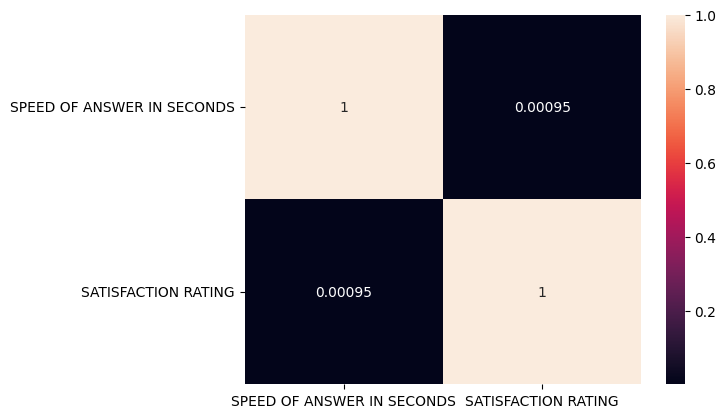

In [132]:
sns.heatmap(Telecom.corr(numeric_only=True), annot=True);

#### Utilizamos un gráfico de correlación para analizar si las variables numéricas se correlacionan entre si, según la información no una relación clara entre las variables en este primer análisis.


##  6.Análisis Univariante & distribución de las llamadas

## Distribución de llamados por agente

In [133]:
llamadas_por_agente = Telecom.groupby('AGENT')['CALL ID'].count()

In [134]:
llamadas_por_agente

AGENT
Becky      517
Dan        523
Diane      501
Greg       502
Jim        536
Joe        484
Martha     514
Stewart    477
Name: CALL ID, dtype: int64

C:\Users\Lucia\AppData\Local\Temp\ipykernel_18456\3406539106.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AGENT', y='CALL ID', data=llamadas_por_agente1, palette='viridis')


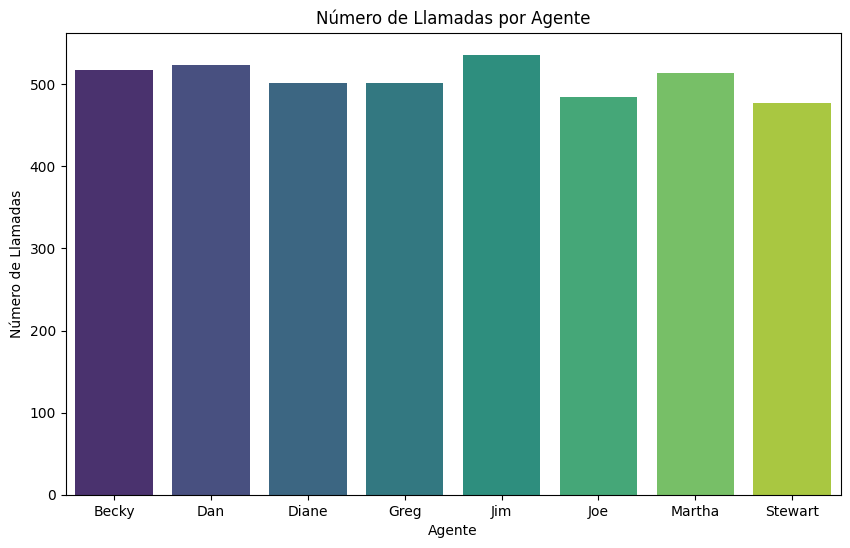

In [135]:
llamadas_por_agente1 = pd.DataFrame(llamadas_por_agente)

plt.figure(figsize=(10, 6))
sns.barplot(x='AGENT', y='CALL ID', data=llamadas_por_agente1, palette='viridis')
plt.title('Número de Llamadas por Agente')
plt.xlabel('Agente')
plt.ylabel('Número de Llamadas')
plt.show()

## SPEED OF ANSWER IN SECONDS' , visualizamos la distribución de los tiempos de respuesta

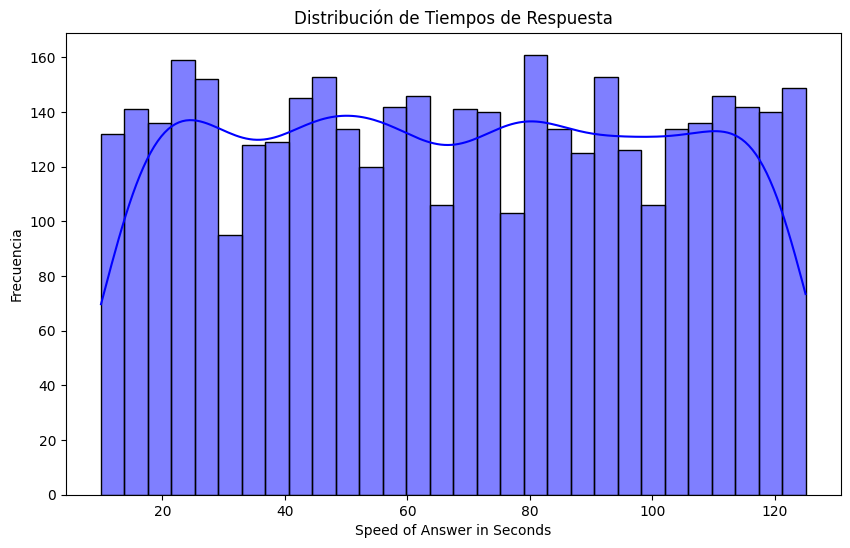

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(Telecom['SPEED OF ANSWER IN SECONDS'], bins=30, kde=True, color='blue')
plt.title('Distribución de Tiempos de Respuesta')
plt.xlabel('Speed of Answer in Seconds')
plt.ylabel('Frecuencia')
plt.show()

#### Se analiza la cantidad de llamados que se reciben diariamente y los separamos por los atentidos y los no atentidos

In [137]:
llamados_diarios = Telecom_en_bruto.groupby(Telecom_en_bruto['DATE'].dt.to_period('D')).size()
llamados_diarios

DATE
2021-01-01    58
2021-01-02    60
2021-01-03    58
2021-01-04    54
2021-01-05    56
              ..
2021-03-27    58
2021-03-28    38
2021-03-29    60
2021-03-30    25
2021-03-31    27
Freq: D, Length: 90, dtype: int64

In [138]:
llamados_diarios_atendidos = Telecom.groupby(Telecom['DATE'].dt.to_period('D')).size()
llamados_diarios_atendidos

DATE
2021-01-01    46
2021-01-02    48
2021-01-03    47
2021-01-04    44
2021-01-05    49
              ..
2021-03-27    46
2021-03-28    31
2021-03-29    50
2021-03-30    16
2021-03-31    20
Freq: D, Length: 90, dtype: int64

In [139]:
llamados_diarios_noatendidos = Telecom_N.groupby(Telecom_N['DATE'].dt.to_period('D')).size()
llamados_diarios_noatendidos

DATE
2021-01-01    12
2021-01-02    12
2021-01-03    11
2021-01-04    10
2021-01-05     7
              ..
2021-03-27    12
2021-03-28     7
2021-03-29    10
2021-03-30     9
2021-03-31     7
Freq: D, Length: 90, dtype: int64

#### Graficamos la distribución de llamados diarios

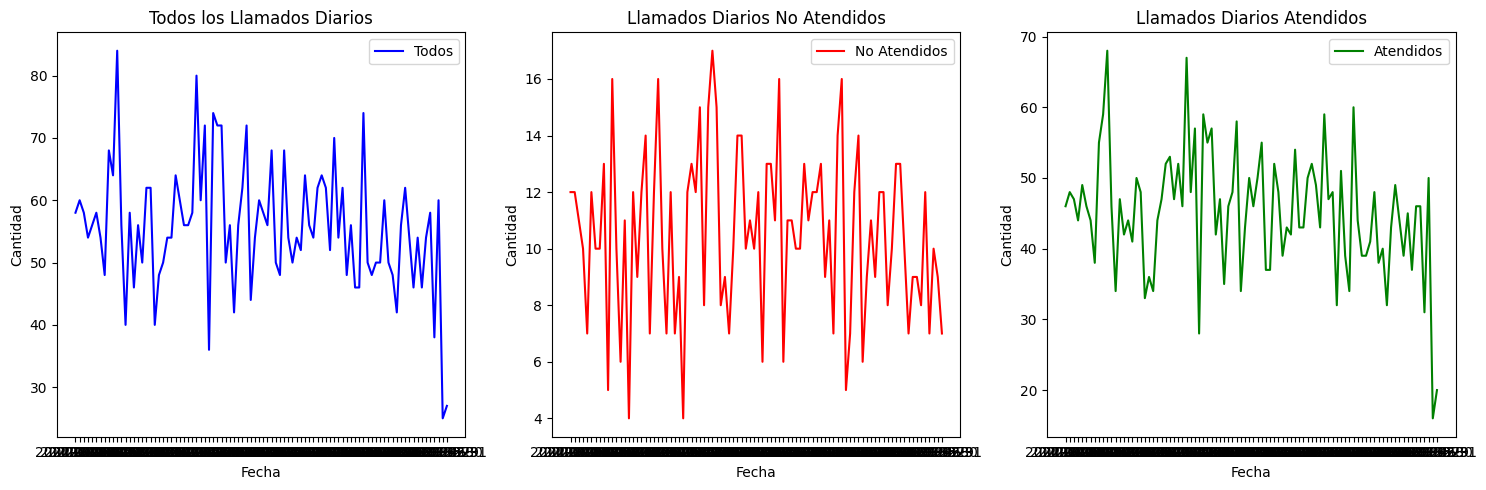

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[1].plot(llamados_diarios_noatendidos.index.astype(str), llamados_diarios_noatendidos.values, label='No Atendidos', color='red')
axes[1].set_title('Llamados Diarios No Atendidos')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Cantidad')
axes[1].legend()


axes[2].plot(llamados_diarios_atendidos.index.astype(str), llamados_diarios_atendidos.values, label='Atendidos', color='green')
axes[2].set_title('Llamados Diarios Atendidos')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Cantidad')
axes[2].legend()

axes[0].plot(llamados_diarios.index.astype(str), llamados_diarios.values, label='Todos', color='blue')
axes[0].set_title('Todos los Llamados Diarios')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Cantidad')
axes[0].legend()

plt.tight_layout()
plt.show()

In [141]:
llamados_semanales_noatendidos = Telecom_N.groupby(Telecom_N['DATE'].dt.to_period('w')).size()
llamados_semanales_atendidos = Telecom.groupby(Telecom['DATE'].dt.to_period('w')).size()
llamados_semanales = Telecom_en_bruto.groupby(Telecom_en_bruto['DATE'].dt.to_period('w')).size()

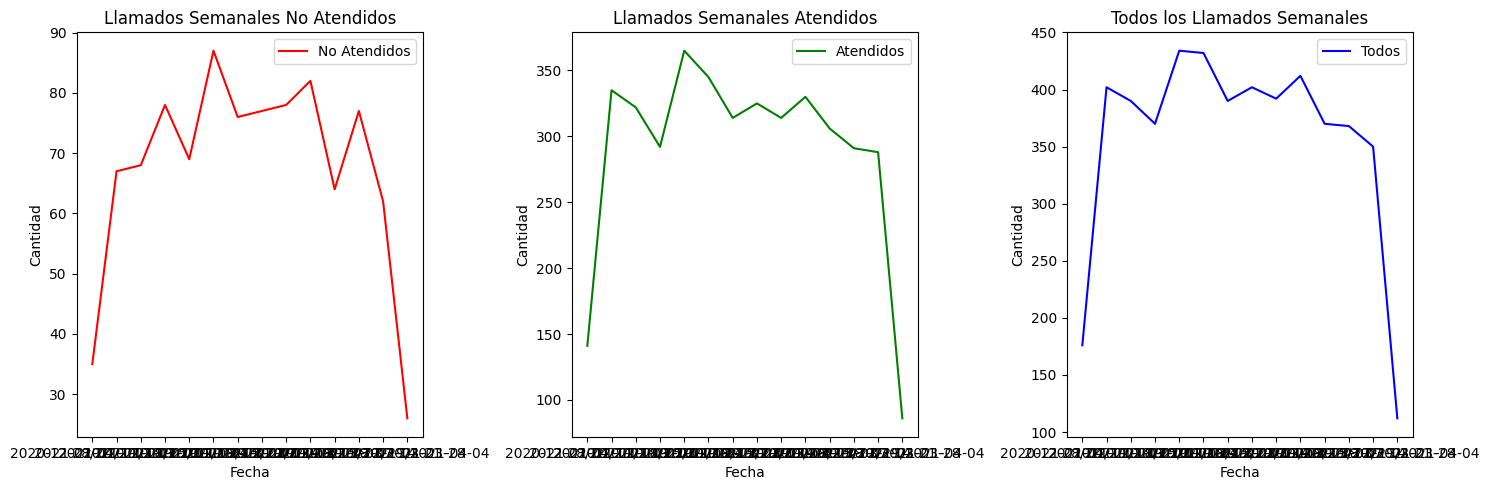

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].plot(llamados_semanales_noatendidos.index.astype(str), llamados_semanales_noatendidos.values, label='No Atendidos', color='red')
axes[0].set_title('Llamados Semanales No Atendidos')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Cantidad')
axes[0].legend()

axes[1].plot(llamados_semanales_atendidos.index.astype(str), llamados_semanales_atendidos.values, label='Atendidos', color='green')
axes[1].set_title('Llamados Semanales Atendidos')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Cantidad')
axes[1].legend()


axes[2].plot(llamados_semanales.index.astype(str), llamados_semanales.values, label='Todos', color='blue')
axes[2].set_title('Todos los Llamados Semanales')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Cantidad')
axes[2].legend()

plt.tight_layout()
plt.show()

## Distribucion de llamadas por franja horaria

In [143]:
llamadas_por_hora = (Telecom['TIME'].value_counts().sort_index())
llamadas_por_hora

TIME
0 days 09:00:00    17
0 days 09:01:26     8
0 days 09:02:53     9
0 days 09:04:19    10
0 days 09:05:46    16
                   ..
0 days 17:54:14     8
0 days 17:55:41     7
0 days 17:57:07    18
0 days 17:58:34     9
0 days 18:00:00    12
Name: count, Length: 375, dtype: int64

### Visualizamos las llamadas en la franja horaria tratando de identificar picos

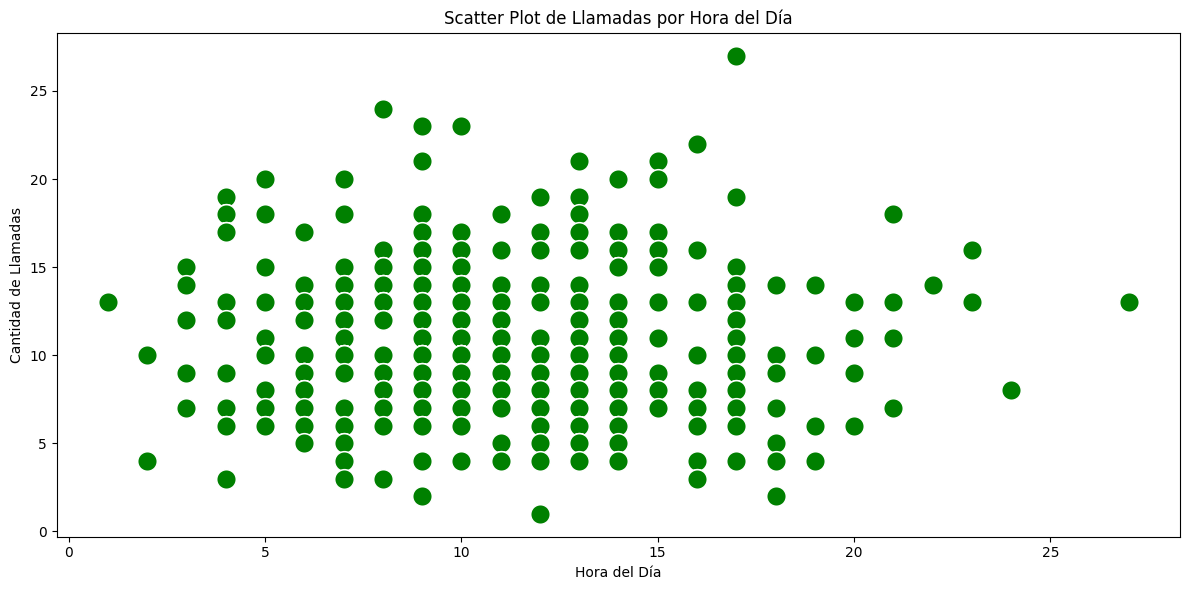

In [144]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Telecom['TIME'].value_counts().sort_index(), y=Telecom['TIME'].value_counts().values, s=200, color='GREEN')
plt.title('Scatter Plot de Llamadas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Llamadas')
plt.tight_layout()

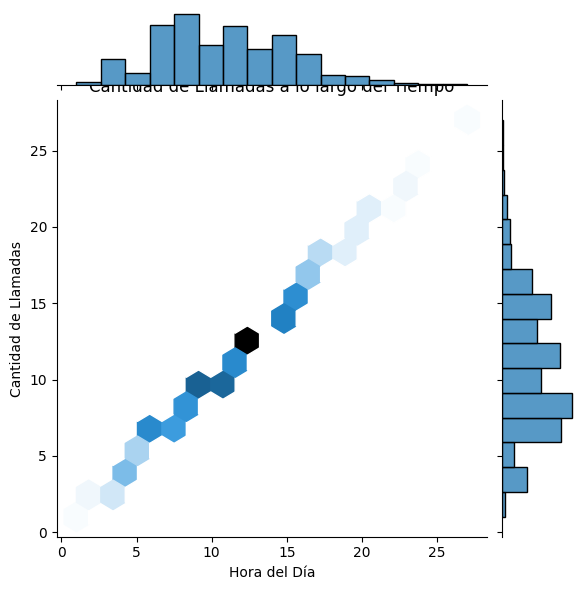

In [145]:
f = sns.load_dataset('iris')
 

sns.jointplot(x=llamadas_por_hora, y=llamadas_por_hora, kind='hex')
plt.title('Cantidad de Llamadas a lo largo del Tiempo')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Llamadas')
plt.show()

In [146]:
hourly_intervals = pd.cut(Telecom['TIME'], bins=pd.timedelta_range(start=Telecom['TIME'].min(), end=Telecom['TIME'].max(), freq='1H'))


llamadas_por_hora_agrupado = Telecom.groupby(hourly_intervals).size()

print(llamadas_por_hora_agrupado)

TIME
(0 days 09:00:00, 0 days 10:00:00]    419
(0 days 10:00:00, 0 days 11:00:00]    432
(0 days 11:00:00, 0 days 12:00:00]    504
(0 days 12:00:00, 0 days 13:00:00]    408
(0 days 13:00:00, 0 days 14:00:00]    484
(0 days 14:00:00, 0 days 15:00:00]    418
(0 days 15:00:00, 0 days 16:00:00]    423
(0 days 16:00:00, 0 days 17:00:00]    462
(0 days 17:00:00, 0 days 18:00:00]    487
dtype: int64


C:\Users\Lucia\AppData\Local\Temp\ipykernel_18456\861698993.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  llamadas_por_hora_agrupado = Telecom.groupby(hourly_intervals).size()


### Visualizamos las llamadas en la franja horaria  agrupado tratando de identificar picos

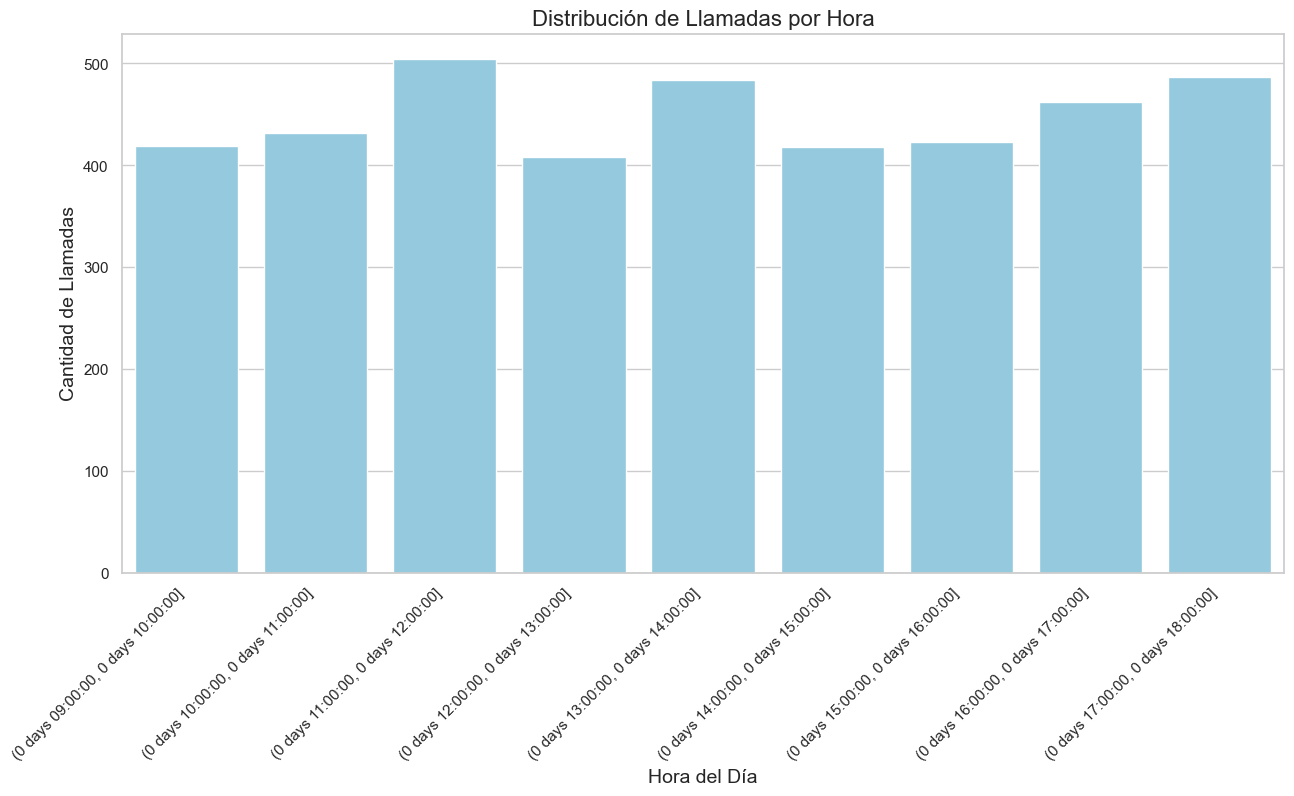

In [147]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))
sns.barplot(x=llamadas_por_hora_agrupado.index, y=llamadas_por_hora_agrupado.values, color='skyblue')

plt.title('Distribución de Llamadas por Hora', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Cantidad de Llamadas', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

#### Hay mayor concentración de llamadas entre el mediodia hasta las 14 horas y luego de las 17 horas podria decirse que los picos se dan en horario no laborales.

In [148]:
llamadas_por_dia_de_la_semana = Telecom['DAY_OF_THE_WEEK'].value_counts().sort_index()
llamadas_por_dia_de_la_semana

DAY_OF_THE_WEEK
Friday       546
Monday       629
Saturday     614
Sunday       588
Thursday     579
Tuesday      554
Wednesday    544
Name: count, dtype: int64

### Analizamos la cantidad de llamadas por día

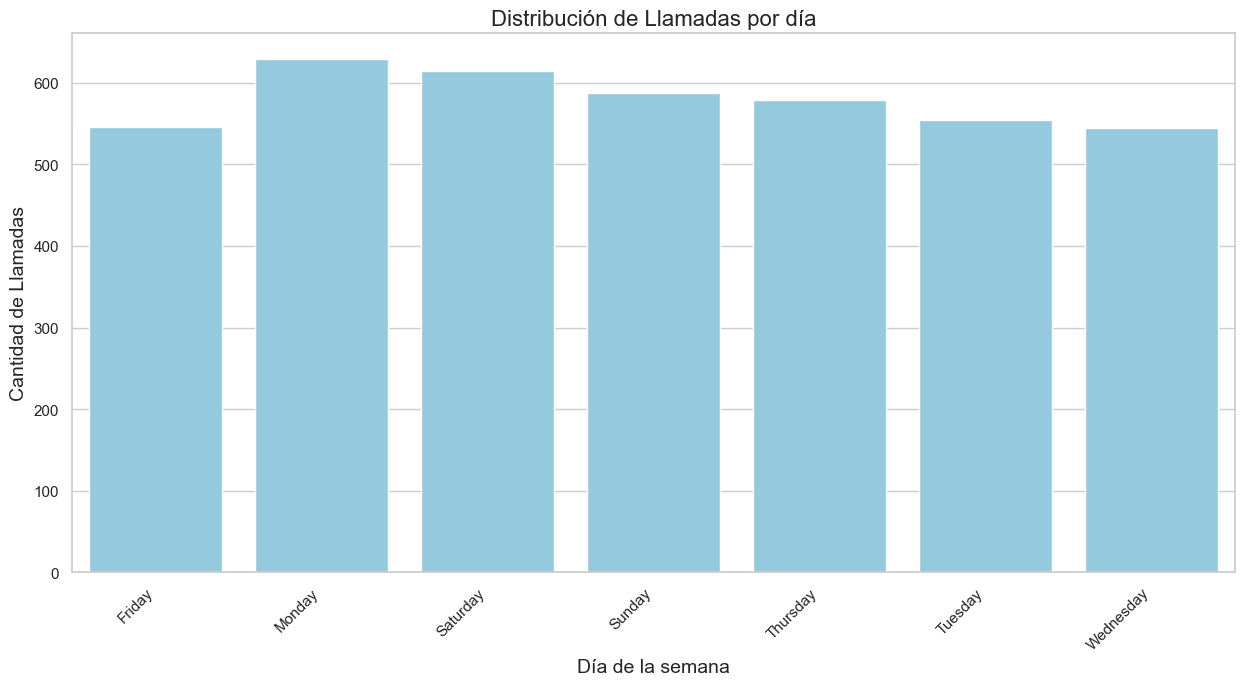

In [149]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))
sns.barplot(x=llamadas_por_dia_de_la_semana.index, y=llamadas_por_dia_de_la_semana.values, color='skyblue')

plt.title('Distribución de Llamadas por día', fontsize=16)
plt.xlabel('Día de la semana', fontsize=14)
plt.ylabel('Cantidad de Llamadas', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

## 7.Análisis Bivariante  

### En primer lugar aplicamos un pairplot para visualizar una matriz de gráficos de dispersión para visualizar las relaciones bivariadas entre diferentes variables numericas

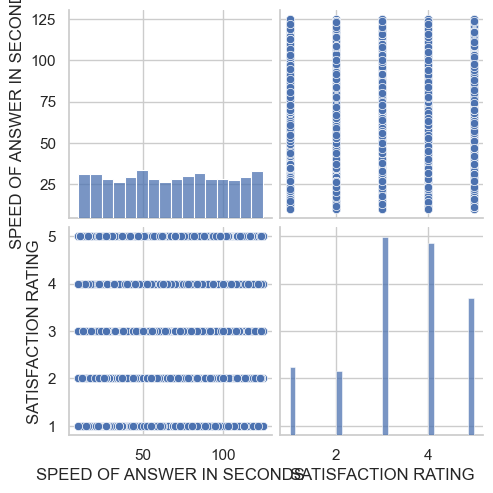

In [150]:
datostelecom = Telecom.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(Telecom[datostelecom])
plt.show()

### Se analza el nivel de satisfación teniendo en cuenta si la consulta fue resuelta o no 

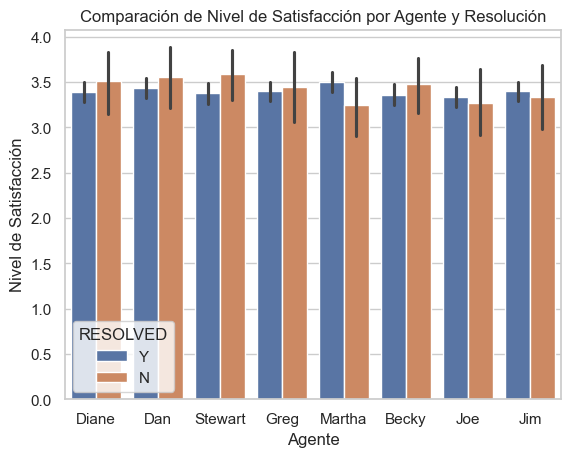

In [151]:
sns.barplot(x='AGENT', y='SATISFACTION RATING', hue='RESOLVED', data=Telecom)
plt.xlabel('Agente')
plt.ylabel('Nivel de Satisfacción')
plt.title('Comparación de Nivel de Satisfacción por Agente y Resolución')
plt.show()

In [152]:
satisfaccion_resueltas = Telecom[Telecom['RESOLVED'] == 'Y']['SATISFACTION RATING'].mean()
satisfaccion_noresueltas = Telecom[Telecom['RESOLVED'] == 'N']['SATISFACTION RATING'].mean()
print(satisfaccion_resueltas)
print(satisfaccion_noresueltas)


3.4007131102578168
3.428921568627451


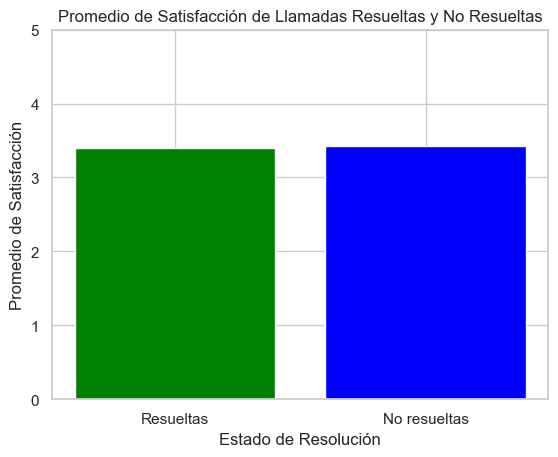

In [153]:
labels = ['Resueltas', 'No resueltas']
promedios = [satisfaccion_resueltas, satisfaccion_noresueltas]

plt.bar(labels, promedios, color=['green', 'blue'])
plt.xlabel('Estado de Resolución')
plt.ylabel('Promedio de Satisfacción')
plt.title('Promedio de Satisfacción de Llamadas Resueltas y No Resueltas')
plt.ylim(0, 5)  # Ajustar el rango del eje y si es necesario
plt.show()

### No hay una clara relación que se vea en los graficos respecto de que el nivel de satisfacción tenga una relación en si la consulta esta resuelta o no

# **5.HIPOTESIS**

## **Hipotesis planteadas**

###  **1) El principal motivo de contactos, representa al menos un 25% del volumen total y además este representa mas del 35% del tiempo opertativo insumido**

**H0**: No hay evidencia significativa en el volumen de los datos y la representacion de mas del 35% del tiempo opertativo insumido.

**H1**: Existe una diferencia significativa que el volumen los datos y la representacion de mas del 35% del tiempo opertativo insumido .

### **2) La distribución de llamados siguen una distribución normal**

**H0**: No hay evidencia significativa de que datos siguen una distribución normal

**H1**: Existe una evidencia significativa de que los datos siguen una distribución normal.(Análisis de normalidad)

### **3) Los niveles de satisfación mas bajos corresponden son directamente atribuibles al no resolucion del caso y a una espera superior al 15% del promedio de espera**

**H0**: No hay evidencia significativa para atribuir los niveles de satisfacción mas bajo.

**H1**: Existe una evidencia significativa de que los niveles de satisfacción mas bajo son atribuibles al no resolucion del caso y a una espera superior al 15% del promedio de espera

### **4) El 70% de los casos relacionados a los pagos se dan del 25 al 05 de cada mes  y son resueltos**

**H0**: No hay evidencia significativa de que a las interaciones relacionadas a pagos se dan del 25 al 05 de cada mes  y son resueltos.

**H1**: Existe una diferencia significativa en que a las interaciones relacionadas a pagos se dan del 25 al 05 de cada mes  y son resueltos .

### **5) De reducirce un 10% de los contactos del principal motivo se generaria un eficiencia en tiempos operativos de mas de un 4%**

**H0**: No hay evidencia significativa de reducirce un 10% de los contactos del principal motivo se generaria un eficiencia en tiempos operativos de mas de un 4%.

**H1**: Existe una diferencia significativa de reducirce un 10% de los contactos del principal motivo se generaria un eficiencia en tiempos operativos de mas de un 4%.

-------------------------------------------------------

###  **1) El principal motivo de contactos, representa al menos un 25% del volumen total y además este representa mas del 35% del tiempo opertativo insumido**
**H0**: No hay evidencia significativa en el volumen de los datos y la representacion de mas del 35% del tiempo opertativo insumido.

**H1**: Existe una diferencia significativa que el volumen los datos y la representacion de mas del 35% del tiempo opertativo insumido .

### En primer lugar se definen los datos que son necesarios para analizar la Hipotesis

### Cantidad de llamados del principal motivo de contactos

In [154]:
cantidad_de_llamadas_por_motivo = Telecom_en_bruto['TOPIC'].value_counts()
cantidad_de_llamadas_principal_motivo1 = cantidad_de_llamadas_por_motivo.max()
cantidad_de_llamadas_principal_motivo1

1022

### Porcentaje que representa la cantidad de llamados del principal motivo de contacto sobre el total de llamados

In [155]:
porcentaje = (((Telecom_en_bruto['TOPIC'].value_counts())/Telecom_en_bruto['CALL ID'].count()))
porcentaje.max()

0.2044

 ###  Cantidad total de llamados

In [156]:
total_de_llamados = Telecom_en_bruto['CALL ID'].count()
total_de_llamados

5000

#### Unicamente con el fin de analizar la hipotesis con Prueba de proporciones z se crea una nueva columna en donde el tiempo insumido se exprese en float

#### total del tiempo insumido de todos los llamados

In [157]:
Telecom_en_bruto['AVGTALKDURATION_SECONDS'] = Telecom_en_bruto['AVGTALKDURATION'].dt.total_seconds()

# Total de tiempo insumido en segundos
totaldetiempoinsumido = Telecom_en_bruto['AVGTALKDURATION_SECONDS'].sum()
totaldetiempoinsumido

911837.0

#### Total del tiempo insumido en los casos que son motivo principal de contacto

In [158]:

tiempoinsumidoportopic =tiempoinsumidoportopic = Telecom_en_bruto.groupby('TOPIC')['AVGTALKDURATION'].sum().dt.total_seconds()
tiempoprincipalmotivodellamados = tiempoinsumidoportopic.sum()
tiempoprincipalmotivodellamados

911837.0

### Porcentaje que representa la cantidad de llamados del principal motivo de contacto sobre el total de llamados

In [159]:
porcentaje_tiempoprincipalmotivodellamados = tiempoprincipalmotivodellamados / totaldetiempoinsumido
porcentaje_tiempoprincipalmotivodellamados

1.0

In [160]:
import numpy as np
import statsmodels.api as sm

# LLAMAOS A LAS VARIABLES Y LES ASIGNAMOS UN NOMBRE MAS INTUITIVO
total_llamadas1 = total_de_llamados
total_tiempo_operativo = totaldetiempoinsumido
proporcion_volumen_principales = porcentaje.max()
proporcion_tiempo_operativo_principales = porcentaje_tiempoprincipalmotivodellamados

# ASIGNAMOS VARIABLES SEGUN LA HIPOTESIS PLANTEADA
proporcion_esperada_volumen = 0.25
proporcion_esperada_tiempo_operativo = 0.35

# HACEMOS UNA PRIMERA PRUEBA Z SOBRE  EL VOLUMEN DE CONTACTOS Y ANALIZAR SI EL PRINCIPAL REPRESENTA AL MENOS UN 25 % DEL TOTAL 
z_volumen, p_valor_volumen = sm.stats.proportions_ztest(cantidad_de_llamadas_principal_motivo1, total_de_llamados, proporcion_esperada_volumen, alternative='larger')

# HACEMOS UNA PRIMERA PRUEBA Z SOBRE EL TIEMPO INSUMIDO Y ANALIZAR SI EL  REPRESENTA AL MENOS UN 35 % DEL TOTAL 
z_tiempo_operativo, p_valor_tiempo_operativo = sm.stats.proportions_ztest(tiempoprincipalmotivodellamados, total_tiempo_operativo, proporcion_esperada_tiempo_operativo, alternative='larger')


alpha = 0.05


print("Estadístico z (volumen total):", z_volumen)
print("Valor p (volumen total):", p_valor_volumen)


if p_valor_volumen < alpha and proporcion_tiempo_operativo_principales > proporcion_esperada_volumen:
    print("Rechazamos la hipótesis nula para el volumen total. Hay evidencia significativa de que la proporción es mayor al 25%.")
else:
    print("No podemos rechazar la hipótesis nula para el volumen total. No hay evidencia significativa de que la proporción sea mayor al 25%.")


print("\nEstadístico z (tiempo operativo):", z_tiempo_operativo)
print("Valor p (tiempo operativo):", p_valor_tiempo_operativo)


if p_valor_tiempo_operativo < alpha and proporcion_tiempo_operativo_principales > proporcion_esperada_tiempo_operativo:
    print("Rechazamos la hipótesis nula para el tiempo operativo. Hay evidencia significativa de que la proporción es mayor al 35%.")
else:
    print("No podemos rechazar la hipótesis nula para el tiempo operativo. No hay evidencia significativa de que la proporción sea mayor al 35%.")

Estadístico z (volumen total): -7.995801645173547
Valor p (volumen total): 0.9999999999999993
No podemos rechazar la hipótesis nula para el volumen total. No hay evidencia significativa de que la proporción sea mayor al 25%.

Estadístico z (tiempo operativo): inf
Valor p (tiempo operativo): 0.0
Rechazamos la hipótesis nula para el tiempo operativo. Hay evidencia significativa de que la proporción es mayor al 35%.


c:\Users\Lucia\miniconda3\envs\.venv\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


#### Graficamos la hipotesis planteada

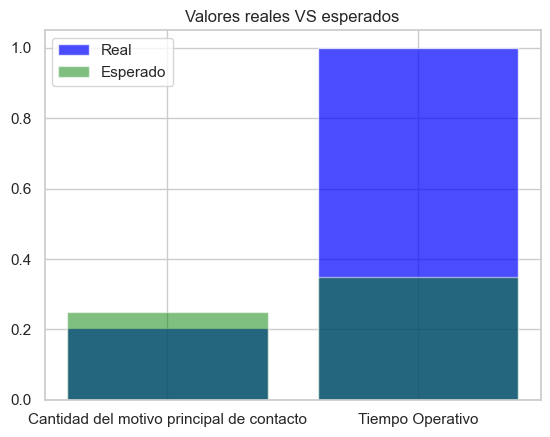

In [161]:
Valor_real = [porcentaje.max(), porcentaje_tiempoprincipalmotivodellamados]
Valor_espesperado = [proporcion_esperada_volumen, proporcion_esperada_tiempo_operativo]

labels = ['Cantidad del motivo principal de contacto', 'Tiempo Operativo']

fig, ax = plt.subplots()
ax.bar(labels, Valor_real, label='Real', color='blue', alpha=0.7)
ax.bar(labels, Valor_espesperado, label='Esperado', color='green', alpha=0.5)

ax.legend()
plt.title('Valores reales VS esperados')
plt.show()

------------------------------------------------

##  **2) La distribución de llamados siguen una distribución normal**
**H0**: No hay evidencia significativa de que datos siguen una distribución normal

**H1**: Existe una evidencia significativa de que los datos siguen una distribución normal.(Análisis de normalidad)

Estadística de prueba: 0.9757611751556396
Valor p: 0.090619757771492
Los datos siguen una distribución normal (se rechaza la hipótesis nula)


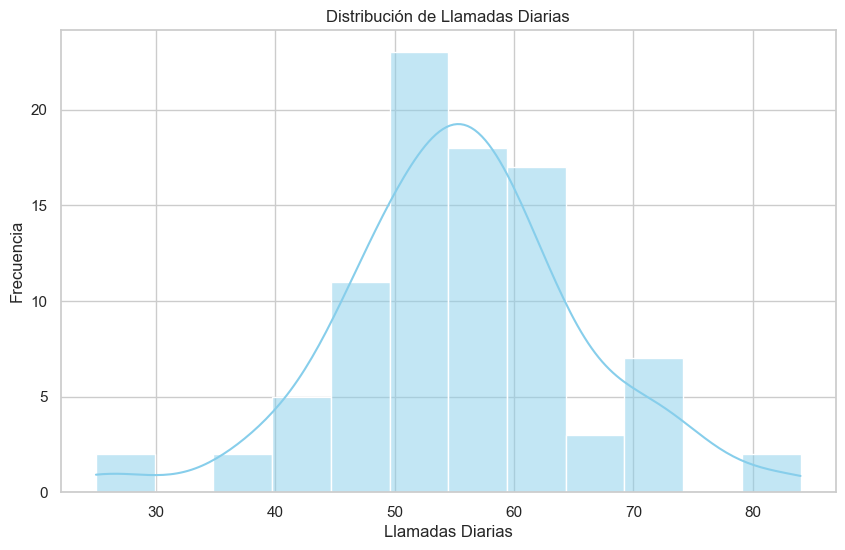

In [162]:
from scipy.stats import shapiro
stat, p_value = shapiro(llamados_diarios)

# Imprimir el resultado de la prueba
print("Estadística de prueba:", stat)
print("Valor p:", p_value)

# Establecer un nivel de significancia (por ejemplo, 0.05) para tomar una decisión
alpha = 0.05
if p_value < alpha:
    print("Los datos no parecen seguir una distribución normal ( se  rechaza la hipótesis nula)")
else:
    print("Los datos siguen una distribución normal (se rechaza la hipótesis nula)")

# Visualizar la distribución de llamadas diarias
plt.figure(figsize=(10, 6))
sns.histplot(llamados_diarios, kde=True, color='skyblue')
plt.title('Distribución de Llamadas Diarias')
plt.xlabel('Llamadas Diarias')
plt.ylabel('Frecuencia')
plt.show()

-------------------------------------------

## **3) La velocidad de respuesta un 15 % más lento que el promedio  y la  baja satisfacción del usuario afectan la probabilidad de resolución**

**H0**: No hay evidencia significativa de que la velocidad de respuesta en segundos y la satisfacción del usuario tengan un efecto en la probabilidad de que una interacción sea resuelta.
**H1**: Existe una diferencia significativa en la probabilidad de que una interacción sea resuelta en función de la velocidad de respuesta en segundos y la satisfacción del usuario.


### Análisis de regresión lineal para examinar la relación entre los niveles de satisfacción y dos variables independientes: la resolución del caso (binaria: resuelto o no resuelto) y el tiempo de espera.

In [163]:
Telecom

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,0 days 13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0
1,ID0056,Dan,2021-01-01,Friday,0 days 17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0
2,ID0039,Stewart,2021-01-01,Friday,0 days 14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0
3,ID0009,Greg,2021-01-01,Friday,0 days 11:13:55,Admin Support,Y,Y,15.0,0 days 00:06:38,4.0
4,ID0043,Diane,2021-01-01,Friday,0 days 14:47:02,Technical Support,Y,Y,45.0,0 days 00:06:21,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4049,ID4987,Stewart,2021-03-31,Wednesday,0 days 13:01:55,Payment related,Y,N,10.0,0 days 00:02:26,4.0
4050,ID4986,Diane,2021-03-31,Wednesday,0 days 12:50:24,Streaming,Y,N,55.0,0 days 00:02:01,1.0
4051,ID4998,Diane,2021-03-31,Wednesday,0 days 16:53:46,Payment related,Y,Y,84.0,0 days 00:01:49,4.0
4052,ID4999,Jim,2021-03-31,Wednesday,0 days 17:02:24,Streaming,Y,Y,98.0,0 days 00:00:58,5.0


In [164]:
import statsmodels.api as sm
import pandas as pd


data = Telecom

data['RESOLVED1'] = data['RESOLVED'].map({'Y': True, 'N': False})

# CONVERTIMOS EL TIPO DE COLUMNA EN BOOLEANO CON EL FIN DE APLICAR EL MODELO 
data['RESOLVED1'] = data['RESOLVED1'].astype(bool)

# AGREGAMOS LA VARIABLES INDEPENDIENTES
X = data[['SPEED OF ANSWER IN SECONDS','SATISFACTION RATING']]
X = sm.add_constant(X)  #  SEGUN EL MODELO SE AGREGA LA CONSTANTE
y = data['RESOLVED1'] # AGREGAMOS LA VARIABLE DEPENDIENTE

model = sm.Logit(y, X)
result = model.fit()


print(result.summary())


p_values = result.pvalues

alpha = 0.05

if p_values['SPEED OF ANSWER IN SECONDS'] < alpha and p_values['SATISFACTION RATING'] < alpha:
    print("Rechazar H0: Existe evidencia significativa de que la velocidad de respuesta y la satisfacción del usuario afectan la probabilidad de resolución.")
    print("Aceptar H1: Existe una diferencia significativa en la probabilidad de resolución en función de la velocidad de respuesta y la satisfacción del usuario.")
else:
    print("No se puede rechazar H0: No hay evidencia significativa de que la velocidad de respuesta y la satisfacción del usuario afecten la probabilidad de resolución.")
    print("No se puede aceptar H1: No hay una diferencia significativa en la probabilidad de resolución en función de la velocidad de respuesta y la satisfacción del usuario.")

Optimization terminated successfully.
         Current function value: 0.326441
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              RESOLVED1   No. Observations:                 4054
Model:                          Logit   Df Residuals:                     4051
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:               0.0001498
Time:                        13:08:48   Log-Likelihood:                -1323.4
converged:                       True   LL-Null:                       -1323.6
Covariance Type:            nonrobust   LLR p-value:                    0.8202
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.2096      0.188     11.730      0.000      

----------------------------------------------

##  **4) El 70% de los casos relacionados a los pagos se dan del 25 al 05 de cada mes  y son resueltos mas de un 70% de estos**

**H0**: No hay evidencia significativa de que a las interaciones relacionadas a pagos se dan del 25 al 05 de cada mes  y son resueltos en mas de un 70%.

**H1**: Existe una diferencia significativa en que a las interaciones relacionadas a pagos se dan del 25 al 05 de cada mes  y son resueltos en mas de un 70%.

### utilizamos pureba z para proporciones y definimos las variables

In [165]:
Motivo_pagos =Telecom[Telecom['TOPIC']=='Payment related']
Motivo_pagos['TOPIC'].count()

818

In [166]:
Motivo_pagos_agrupado_por_fecha= Motivo_pagos[((Motivo_pagos['DATE'].dt.day >= 25) & (data['DATE'].dt.day <= 31)) | ((Motivo_pagos['DATE'].dt.day >= 1) & (Motivo_pagos['DATE'].dt.day <= 5))]

Motivo_pagos_agrupado_por_fecha['DATE'].unique()

C:\Users\Lucia\AppData\Local\Temp\ipykernel_18456\3284526422.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Motivo_pagos_agrupado_por_fecha= Motivo_pagos[((Motivo_pagos['DATE'].dt.day >= 25) & (data['DATE'].dt.day <= 31)) | ((Motivo_pagos['DATE'].dt.day >= 1) & (Motivo_pagos['DATE'].dt.day <= 5))]


<DatetimeArray>
['2021-01-01 00:00:00', '2021-01-02 00:00:00', '2021-01-03 00:00:00',
 '2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-25 00:00:00',
 '2021-01-26 00:00:00', '2021-01-27 00:00:00', '2021-01-28 00:00:00',
 '2021-01-29 00:00:00', '2021-01-30 00:00:00', '2021-01-31 00:00:00',
 '2021-02-01 00:00:00', '2021-02-02 00:00:00', '2021-02-03 00:00:00',
 '2021-02-04 00:00:00', '2021-02-05 00:00:00', '2021-02-25 00:00:00',
 '2021-02-26 00:00:00', '2021-02-27 00:00:00', '2021-02-28 00:00:00',
 '2021-03-01 00:00:00', '2021-03-02 00:00:00', '2021-03-03 00:00:00',
 '2021-03-04 00:00:00', '2021-03-05 00:00:00', '2021-03-25 00:00:00',
 '2021-03-26 00:00:00', '2021-03-27 00:00:00', '2021-03-28 00:00:00',
 '2021-03-29 00:00:00', '2021-03-30 00:00:00', '2021-03-31 00:00:00']
Length: 33, dtype: datetime64[ns]

In [167]:
porcentaje1 = Motivo_pagos_agrupado_por_fecha['TOPIC'].count()/Motivo_pagos['TOPIC'].count()
porcentaje1

0.3924205378973105

In [168]:
cantidad_de_casos=Motivo_pagos_agrupado_por_fecha['TOPIC'].count()
cantidad_de_casos

321

In [169]:
Casos_resueltos_de_pago_agrupados_por_fecha = Motivo_pagos_agrupado_por_fecha[Motivo_pagos_agrupado_por_fecha['RESOLVED'] == 'Y']
total_de_casos_resueltos=Casos_resueltos_de_pago_agrupados_por_fecha['TOPIC'].count()
total_de_casos_resueltos

278

In [170]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

# SE REALIXA LA PRUEBA DE PROPORCIONES 

#AGRUPACION DE CASOS RELACIONADOS A PAGOS DENTRO DE LA FECHA ESTABLECIDA
Motivo_pagos_agrupado_por_fecha

# PORCENTAJE DE CASOS RALACIONADOS A PAGOS DENTRO DE ESAS FECHAS RESPECTO DEL TOTAL DE CASOS DE PAGOS 
porcentaje


# TOTAL DE CASOS RESUELTOS RELACIONADOS A PAGOS DENTRO DE ESAS FECHAS
total_de_casos_resueltos

# PORCENTAJE ESPERADO DE CASOS 
expected_resolved_cases = 0.7 * Motivo_pagos_agrupado_por_fecha['TOPIC'].count()


z_stat, p_value = proportions_ztest(total_de_casos_resueltos, cantidad_de_casos, value=0.7)

print(f"Proporción de casos resueltos: {porcentaje}")
print(f"Número total de casos: {cantidad_de_casos}")
print(f"Número de casos resueltos: {Casos_resueltos_de_pago_agrupados_por_fecha}")
print(f"Número esperado de casos resueltos (70%): {expected_resolved_cases}")
print(f"Estadístico Z: {z_stat}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rechazar H0: Existe una diferencia significativa en que a las interaciones relacionadas a pagos se dan del 25 al 05 de cada mes  y son resueltos en mas de un 70%.")
else:
    print("No se puede rechazar H0: No hay evidencia significativa de que a las interaciones relacionadas a pagos se dan del 25 al 05 de cada mes  y son resueltos en mas de un 70%.")

Proporción de casos resueltos: TOPIC
Streaming            0.2044
Technical Support    0.2038
Payment related      0.2014
Contract related     0.1952
Admin Support        0.1952
Name: count, dtype: float64
Número total de casos: 321
Número de casos resueltos:      CALL ID    AGENT       DATE DAY_OF_THE_WEEK            TIME  \
19    ID0007    Diane 2021-01-01          Friday 0 days 10:22:05   
21    ID0013      Joe 2021-01-01          Friday 0 days 11:52:48   
23    ID0044    Becky 2021-01-01          Friday 0 days 14:47:02   
26    ID0054      Dan 2021-01-01          Friday 0 days 17:36:58   
38    ID0053  Stewart 2021-01-01          Friday 0 days 17:36:58   
...      ...      ...        ...             ...             ...   
4038  ID4996      Jim 2021-03-31       Wednesday 0 days 16:37:55   
4040  ID4990    Becky 2021-03-31       Wednesday 0 days 13:42:14   
4041  ID4983  Stewart 2021-03-31       Wednesday 0 days 11:32:38   
4044  ID4997    Diane 2021-03-31       Wednesday 0 days 16:45

In [172]:
#porcentaje real de casos de relacionados a pagos entre las fecchas establecidad
porcentaje1
#Porcentaje esperado de casos de relacionados a pagos entre las fechas establecidad
Porcentaje_esperado = 0.7
#Cantidad de casos reales dentro de las fechas que fueron resueltos
Cantidad_real = (total_de_casos_resueltos/Motivo_pagos_agrupado_por_fecha['TOPIC'].count())
Total_de_casos_resueltos_esperados = 0.7



In [173]:
Cantidad_real

0.8660436137071651

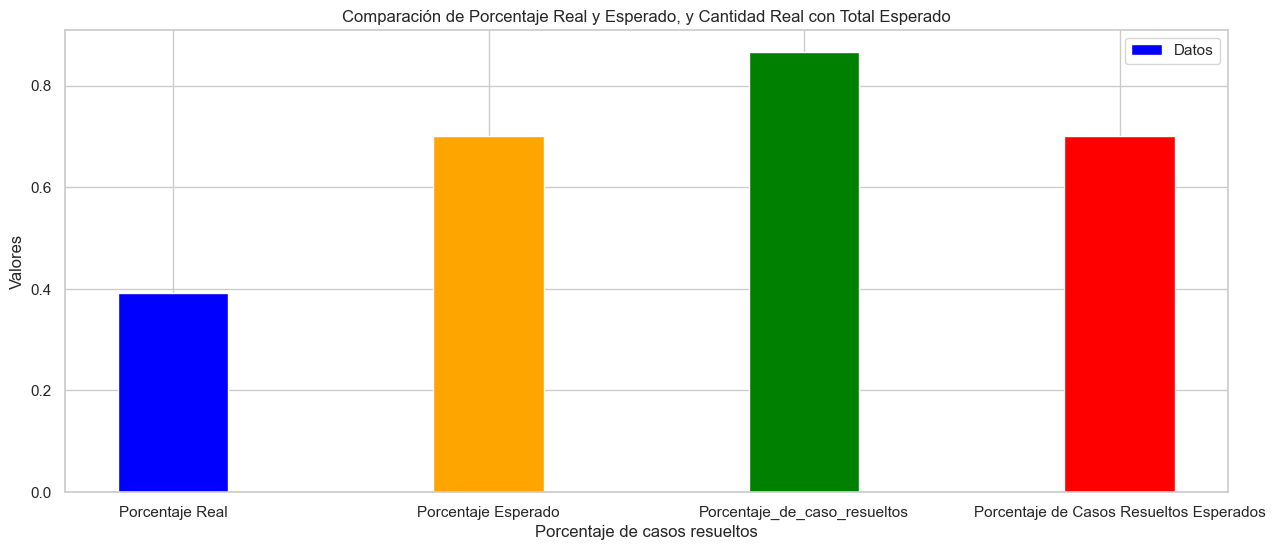

In [174]:
porcentaje_real = porcentaje1
porcentaje_esperado = 0.7
Porcentaje_de_caso_resueltos = Cantidad_real
total_de_casos_resueltos_esperados = 0.7


# Crear una lista de categorías para el gráfico de barras
categorias = ['Porcentaje Real', 'Porcentaje Esperado', 'Porcentaje_de_caso_resueltos', 'Porcentaje de Casos Resueltos Esperados']

# Crear una lista de valores correspondientes a las categorías
valores = [porcentaje_real, porcentaje_esperado, Porcentaje_de_caso_resueltos, total_de_casos_resueltos_esperados]

# Configurar el gráfico
bar_width = 0.35
índices = np.arange(len(categorias))

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(índices, valores, bar_width, label='Datos', color=['blue', 'orange', 'green', 'red'])

# Personalizar el gráfico
plt.xlabel('Porcentaje de casos resueltos')
plt.ylabel('Valores')
plt.title('Comparación de Porcentaje Real y Esperado, y Cantidad Real con Total Esperado')
plt.xticks(índices, categorias)
plt.legend()

# Mostrar el gráfico
plt.show()

--------------------------------------------

## **5) De reducirce un 10% de los contactos del principal motivo se generaria una eficiencia en tiempos operativos de mas de un 4%**

**H0**: No hay evidencia significativa de reducirce un 10% de los contactos del principal motivo se generaría un eficiencia en tiempos operativos de mas de un 4%.

**H1**: Existe una diferencia significativa de reducirse un 10% de los contactos del principal motivo se generaria un eficiencia en tiempos operativos de mas de un 4%.

In [175]:
Telecom['TOPIC'].value_counts()

TOPIC
Streaming            847
Payment related      818
Technical Support    805
Admin Support        795
Contract related     789
Name: count, dtype: int64

In [176]:
Telecom['TOPIC'].value_counts()
Cantidad_de_casos_del_principal_motivo_de_contacto = Telecom['TOPIC'].value_counts().max()
Cantidad_de_casos_del_principal_motivo_de_contacto

847

In [177]:
Telecom['AVGTALKDURATION'].sum()

Timedelta('10 days 13:17:17')

In [178]:
Casos_de_contacto_Streaming = Telecom[Telecom['TOPIC']=='Streaming']
Promedio_de_duración_de_llamadas_streaming = Casos_de_contacto_Streaming['AVGTALKDURATION'].mean()
Eficiencia_operativa_disminuyendo = (Cantidad_de_casos_del_principal_motivo_de_contacto*0.9)*Promedio_de_duración_de_llamadas_streaming
Eficiencia_operativa_disminuyendo

Timedelta('2 days 00:13:19.199999309')

In [179]:
porcentaje_sin_reduccion = (Casos_de_contacto_Streaming['AVGTALKDURATION'].sum()/Telecom['AVGTALKDURATION'].sum())*100

In [180]:
duración_de_llamadas_streaming = Casos_de_contacto_Streaming['AVGTALKDURATION'].sum()

In [181]:
porcentaje_de_eficiencia_operativa_con_la_reduccion = Eficiencia_operativa_disminuyendo/Telecom['AVGTALKDURATION'].sum()*100
porcentaje_de_eficiencia_operativa_con_la_reduccion

19.03840269689747

In [182]:
Casos_de_contacto_Streaming['AVGTALKDURATION']

limite_duracion = pd.Timedelta(minutes=6.36)  # Puedes ajustar el límite según tus necesidades

# Filtrar las filas donde AVGTALKDURATION sea menor que el límite
filas_filtradas = Casos_de_contacto_Streaming[Casos_de_contacto_Streaming['AVGTALKDURATION'] < limite_duracion]

# Imprimir el resultado
filas_filtradas.count()

CALL ID                       762
AGENT                         762
DATE                          762
DAY_OF_THE_WEEK               762
TIME                          762
TOPIC                         762
ANSWERED (Y/N)                762
RESOLVED                      762
SPEED OF ANSWER IN SECONDS    762
AVGTALKDURATION               762
SATISFACTION RATING           762
RESOLVED1                     762
dtype: int64

In [183]:
grupo_con_reduccion_1 = filas_filtradas['AVGTALKDURATION']
grupo_con_reduccion_1

5      0 days 00:05:55
15     0 days 00:04:09
17     0 days 00:04:00
34     0 days 00:02:08
36     0 days 00:01:31
             ...      
4008   0 days 00:01:58
4020   0 days 00:05:21
4046   0 days 00:02:55
4050   0 days 00:02:01
4052   0 days 00:00:58
Name: AVGTALKDURATION, Length: 762, dtype: timedelta64[ns]

In [184]:
grupo_con_reduccion_1_en_segundos = grupo_con_reduccion_1.dt.total_seconds()
grupo_con_reduccion_1_en_segundos

5       355.0
15      249.0
17      240.0
34      128.0
36       91.0
        ...  
4008    118.0
4020    321.0
4046    175.0
4050    121.0
4052     58.0
Name: AVGTALKDURATION, Length: 762, dtype: float64

In [185]:
grupo_con_reduccion_1_en_segundos.sum()

158869.0

In [186]:
grupo_sin_reduccion_1 = Casos_de_contacto_Streaming['AVGTALKDURATION']
grupo_sin_reduccion_1


1      0 days 00:06:45
5      0 days 00:05:55
15     0 days 00:04:09
17     0 days 00:04:00
34     0 days 00:02:08
             ...      
4020   0 days 00:05:21
4035   0 days 00:06:26
4046   0 days 00:02:55
4050   0 days 00:02:01
4052   0 days 00:00:58
Name: AVGTALKDURATION, Length: 847, dtype: timedelta64[ns]

In [187]:
grupo_sin_reduccion_1_en_segundos = grupo_sin_reduccion_1.dt.total_seconds()
grupo_sin_reduccion_1_en_segundos

1       405.0
5       355.0
15      249.0
17      240.0
34      128.0
        ...  
4020    321.0
4035    386.0
4046    175.0
4050    121.0
4052     58.0
Name: AVGTALKDURATION, Length: 847, dtype: float64

In [188]:
grupo_sin_reduccion_1_en_segundos.sum()

192888.0

In [189]:
grupo_con_reduccion_1_en_segundos.sum()

158869.0

In [190]:
from scipy import stats

# Datos para el grupo con reducción del 10%, se convierte en segundos dado que la columna original estaba en deltatime y es formato no valido
grupo_con_reduccion_1_en_segundos

# Datos para el grupo sin reducción del 10%, seconvierte en segundos dado que la columna original estaba en deltatime y es formato no valido
grupo_sin_reduccion_1_en_segundos

# Realizar el test t de Student independiente (asumiendo varianzas iguales, se realiza de tal manera dado que es el mismo grupo a analizar y ya se encuentra filtrado por el motivo mas frecuente de llamado)
t_statistic, p_valor = stats.ttest_ind(grupo_con_reduccion_1_en_segundos, grupo_sin_reduccion_1_en_segundos)

# Imprimir los resultados
print(f'Test t de Student: {t_statistic}')
print(f'Valor p: {p_valor}')

# Interpretar los resultados
if p_valor < 0.05:
    print('Se rechaza la hipótesis nula. Hay evidencia de una diferencia significativa de reducirce un 10% de los contactos del principal motivo se generaria un eficiencia en tiempos operativos de mas de un 4%.')
else:
    print('No se puede rechazar la hipótesis nula. No hay suficiente evidencia de una diferencia significativa de reducirce un 10% de los contactos del principal motivo se generaria un eficiencia en tiempos operativos de mas de un 4%.')

Test t de Student: -3.686986222130747
Valor p: 0.00023446936832897738
Se rechaza la hipótesis nula. Hay evidencia de una diferencia significativa de reducirce un 10% de los contactos del principal motivo se generaria un eficiencia en tiempos operativos de mas de un 4%.


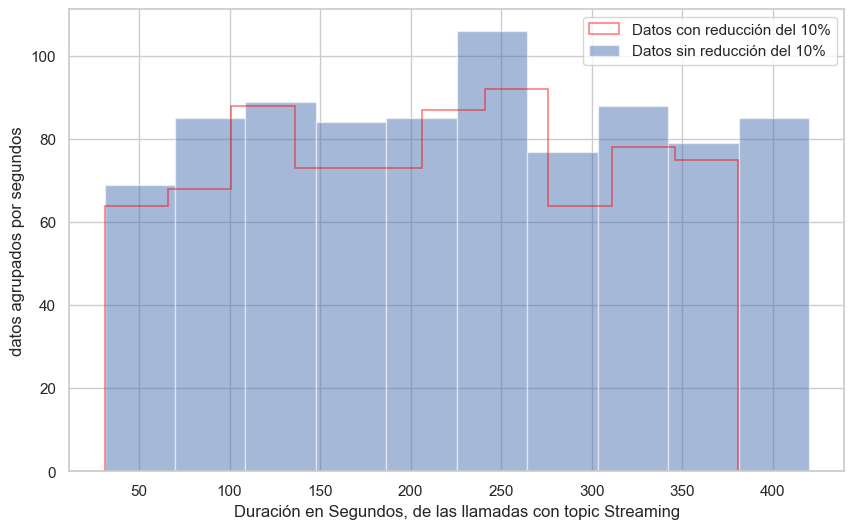

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# HIST GRUOPO CON REDUCCIÓN DEL 10% 
plt.hist(grupo_con_reduccion_1_en_segundos, alpha=0.5, label='Datos con reducción del 10%',color='white', edgecolor= 'red', histtype='step', linewidth=1.2)

# HIST SIN REDUCCIÓN DEL 10 %
plt.hist(grupo_sin_reduccion_1_en_segundos, alpha=0.5, label='Datos sin reducción del 10%')

plt.xlabel('Duración en Segundos, de las llamadas con topic Streaming')
plt.ylabel('datos agrupados por segundos')
plt.legend()
plt.show()

### Podemos visualizar en el grafico una eficiencia operativa y estos representan mas de un 4 % 

# **6.VISUALIZACIONES**

#### utilizamos un gráfico de correlación para analizar si las variables numericas se correlacionan entre si, según la información no una relación clara entre las variables en este primer análisis.


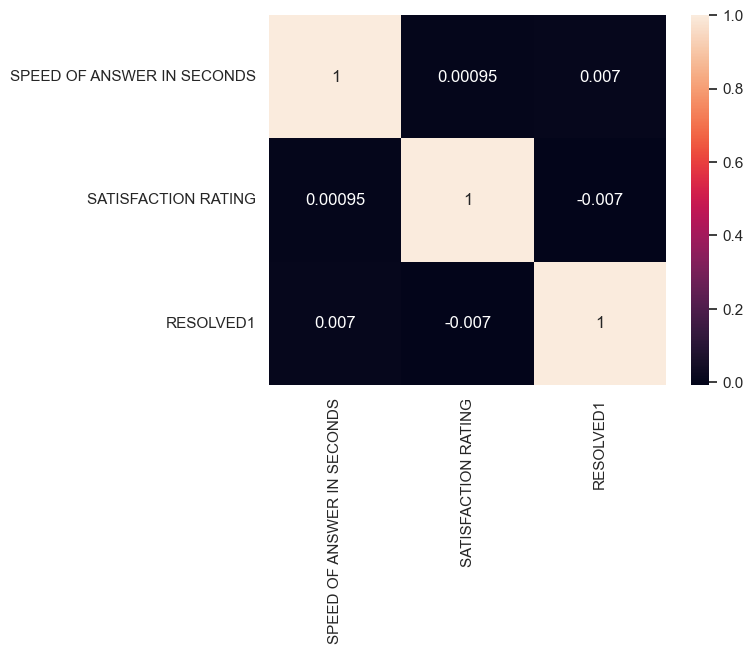

In [192]:
sns.heatmap(Telecom.corr(numeric_only=True), annot=True);

C:\Users\Lucia\AppData\Local\Temp\ipykernel_18456\3406539106.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AGENT', y='CALL ID', data=llamadas_por_agente1, palette='viridis')


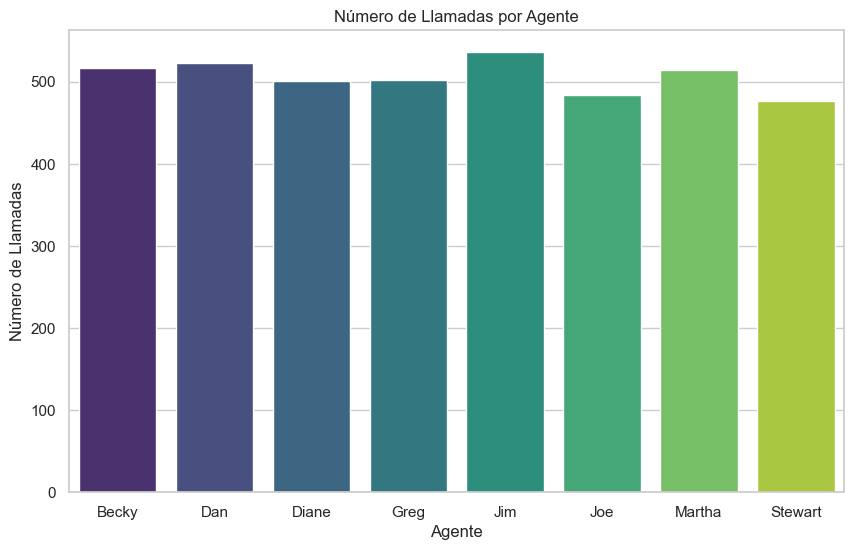

In [193]:
llamadas_por_agente1 = pd.DataFrame(llamadas_por_agente)

plt.figure(figsize=(10, 6))
sns.barplot(x='AGENT', y='CALL ID', data=llamadas_por_agente1, palette='viridis')
plt.title('Número de Llamadas por Agente')
plt.xlabel('Agente')
plt.ylabel('Número de Llamadas')
plt.show()

## SPEED OF ANSWER IN SECONDS' , visualizamos la distribución de los tiempos de respuesta

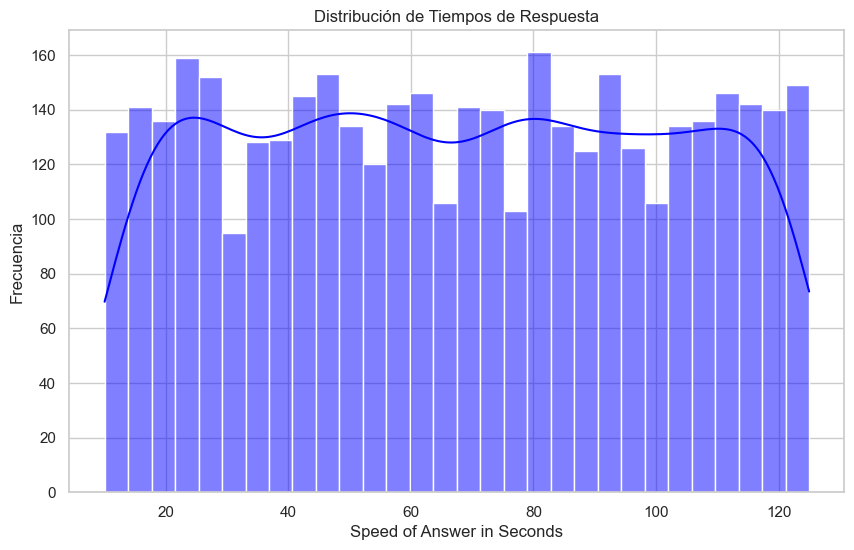

In [194]:
plt.figure(figsize=(10, 6))
sns.histplot(Telecom['SPEED OF ANSWER IN SECONDS'], bins=30, kde=True, color='blue')
plt.title('Distribución de Tiempos de Respuesta')
plt.xlabel('Speed of Answer in Seconds')
plt.ylabel('Frecuencia')
plt.show()

## Distribución de llamados diarios, total de llamados, llamados atendidos, llamados no atentidos

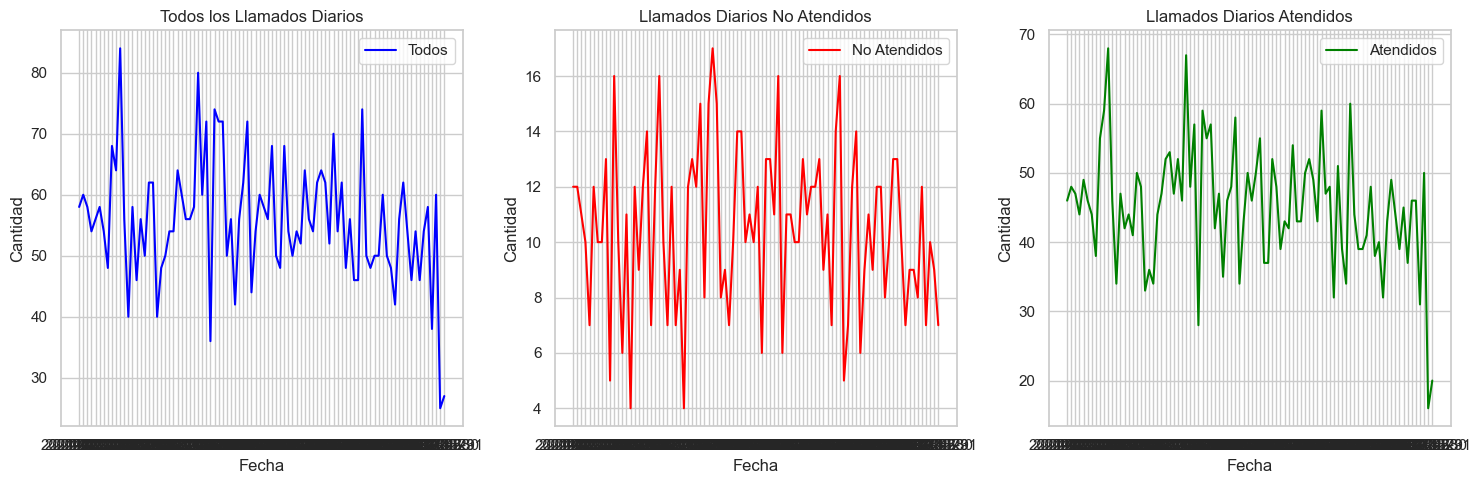

In [195]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[1].plot(llamados_diarios_noatendidos.index.astype(str), llamados_diarios_noatendidos.values, label='No Atendidos', color='red')
axes[1].set_title('Llamados Diarios No Atendidos')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Cantidad')
axes[1].legend()


axes[2].plot(llamados_diarios_atendidos.index.astype(str), llamados_diarios_atendidos.values, label='Atendidos', color='green')
axes[2].set_title('Llamados Diarios Atendidos')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Cantidad')
axes[2].legend()

axes[0].plot(llamados_diarios.index.astype(str), llamados_diarios.values, label='Todos', color='blue')
axes[0].set_title('Todos los Llamados Diarios')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Cantidad')
axes[0].legend()

plt.tight_layout()
plt.show()

## Distribución de llamadas por franja horaria

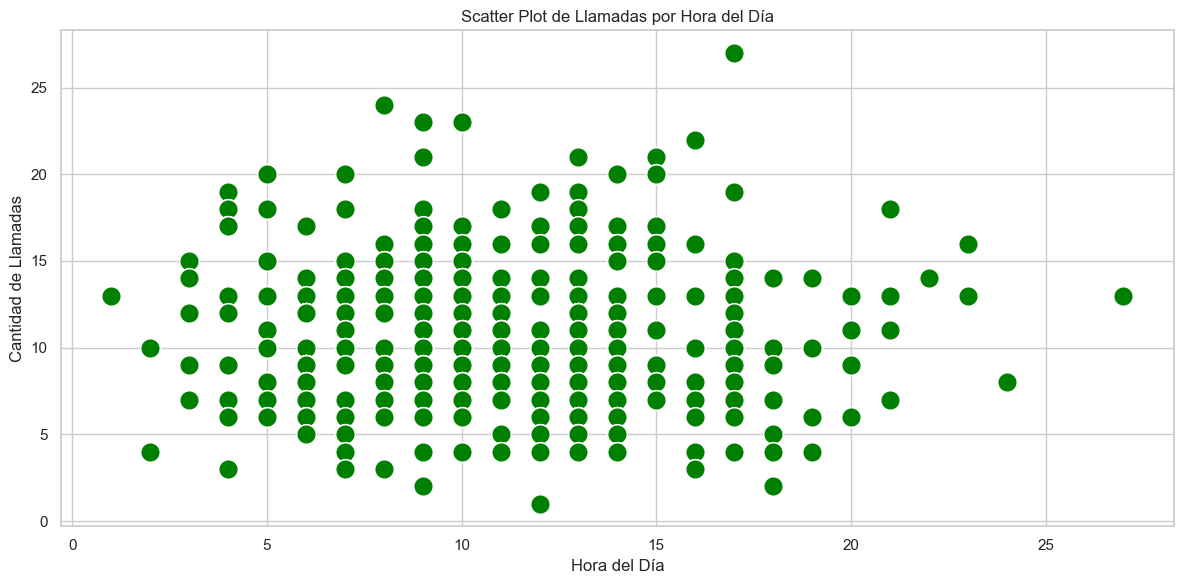

In [196]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Telecom['TIME'].value_counts().sort_index(), y=Telecom['TIME'].value_counts().values, s=200, color='GREEN')
plt.title('Scatter Plot de Llamadas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Llamadas')
plt.tight_layout()

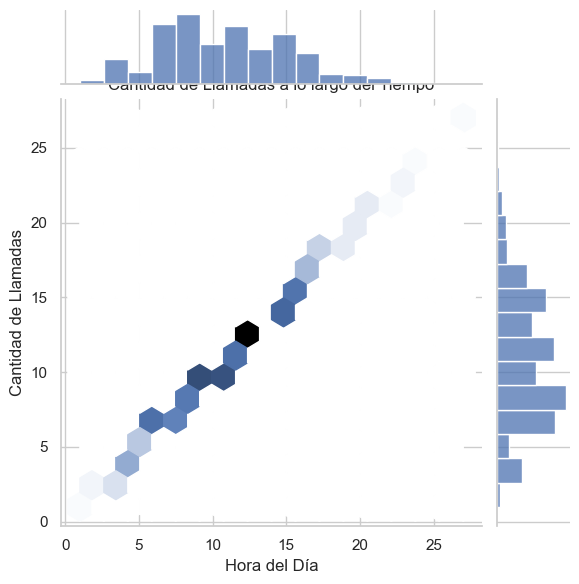

In [197]:
f = sns.load_dataset('iris')
 

sns.jointplot(x=llamadas_por_hora, y=llamadas_por_hora, kind='hex')
plt.title('Cantidad de Llamadas a lo largo del Tiempo')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Llamadas')
plt.show()

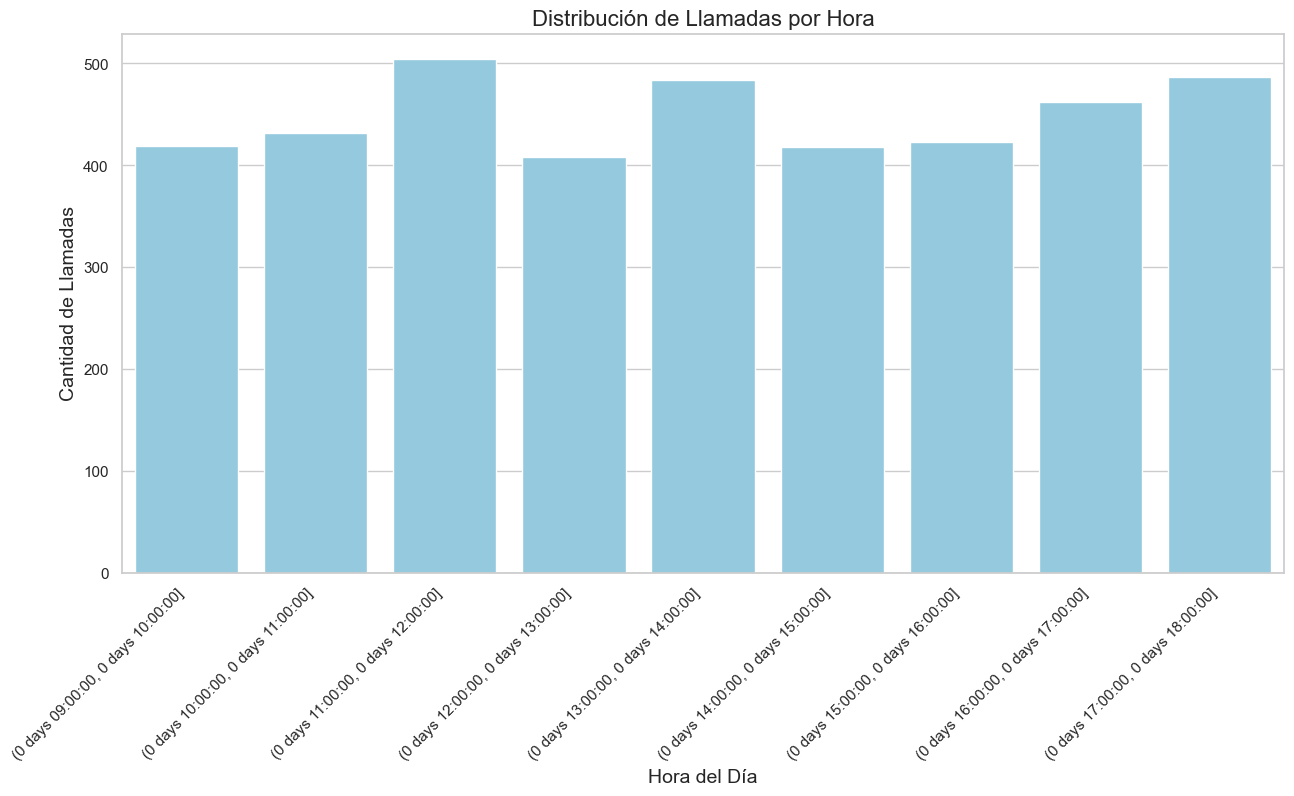

In [198]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))
sns.barplot(x=llamadas_por_hora_agrupado.index, y=llamadas_por_hora_agrupado.values, color='skyblue')

plt.title('Distribución de Llamadas por Hora', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Cantidad de Llamadas', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

### Realizamos una analisis multivariante entre la eficiencia por agente, nivel de satisfacción y resolución

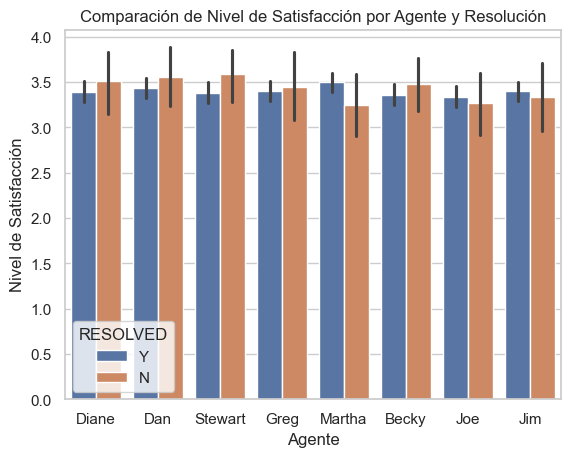

In [199]:
sns.barplot(x='AGENT', y='SATISFACTION RATING', hue='RESOLVED', data=Telecom)
plt.xlabel('Agente')
plt.ylabel('Nivel de Satisfacción')
plt.title('Comparación de Nivel de Satisfacción por Agente y Resolución')
plt.show()

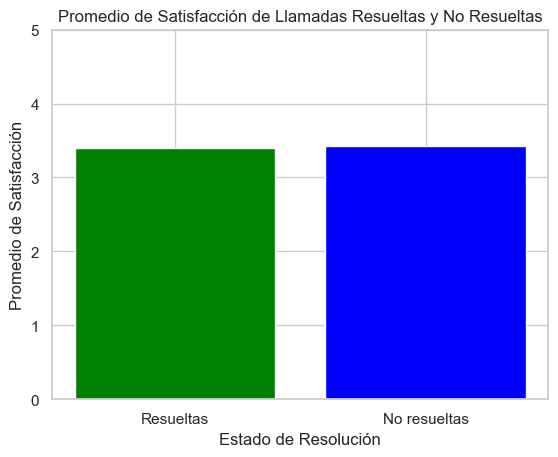

In [200]:
labels = ['Resueltas', 'No resueltas']
promedios = [satisfaccion_resueltas, satisfaccion_noresueltas]

plt.bar(labels, promedios, color=['green', 'blue'])
plt.xlabel('Estado de Resolución')
plt.ylabel('Promedio de Satisfacción')
plt.title('Promedio de Satisfacción de Llamadas Resueltas y No Resueltas')
plt.ylim(0, 5)  # Ajustar el rango del eje y si es necesario
plt.show()

## Grafico Hipotesis N°1

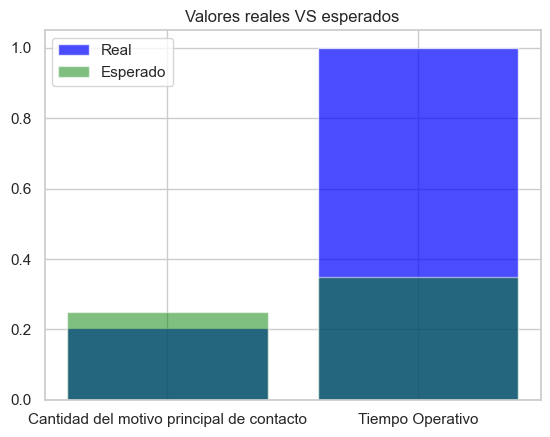

In [201]:
Valor_real = [porcentaje.max(), porcentaje_tiempoprincipalmotivodellamados]
Valor_espesperado = [proporcion_esperada_volumen, proporcion_esperada_tiempo_operativo]

labels = ['Cantidad del motivo principal de contacto', 'Tiempo Operativo']

fig, ax = plt.subplots()
ax.bar(labels, Valor_real, label='Real', color='blue', alpha=0.7)
ax.bar(labels, Valor_espesperado, label='Esperado', color='green', alpha=0.5)

ax.legend()
plt.title('Valores reales VS esperados')
plt.show()

## Grafico Hipotesis N°2

Estadística de prueba: 0.9757611751556396
Valor p: 0.090619757771492
Los datos siguen una distribución normal (se rechaza la hipótesis nula)


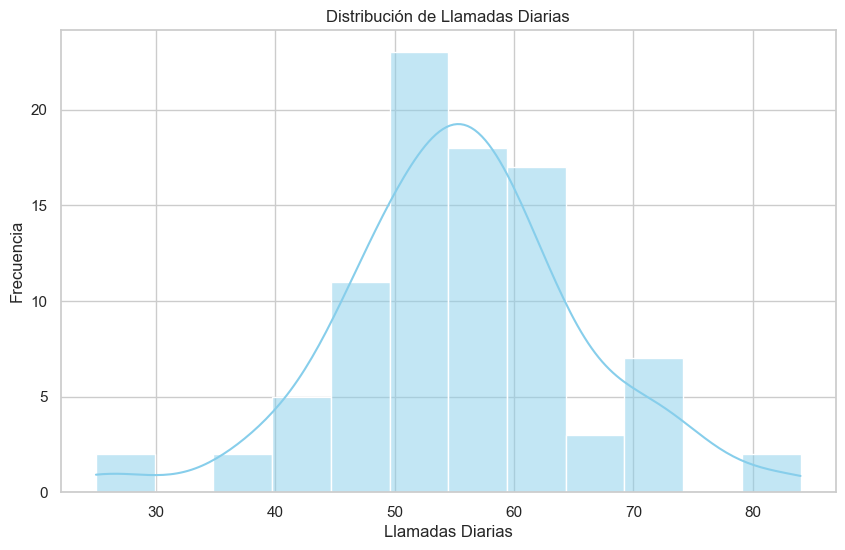

In [202]:
from scipy.stats import shapiro
stat, p_value = shapiro(llamados_diarios)

# Imprimir el resultado de la prueba
print("Estadística de prueba:", stat)
print("Valor p:", p_value)

# Establecer un nivel de significancia (por ejemplo, 0.05) para tomar una decisión
alpha = 0.05
if p_value < alpha:
    print("Los datos no parecen seguir una distribución normal ( se  rechaza la hipótesis nula)")
else:
    print("Los datos siguen una distribución normal (se rechaza la hipótesis nula)")

# Visualizar la distribución de llamadas diarias
plt.figure(figsize=(10, 6))
sns.histplot(llamados_diarios, kde=True, color='skyblue')
plt.title('Distribución de Llamadas Diarias')
plt.xlabel('Llamadas Diarias')
plt.ylabel('Frecuencia')
plt.show()

## Grafico Hipotesis N°4

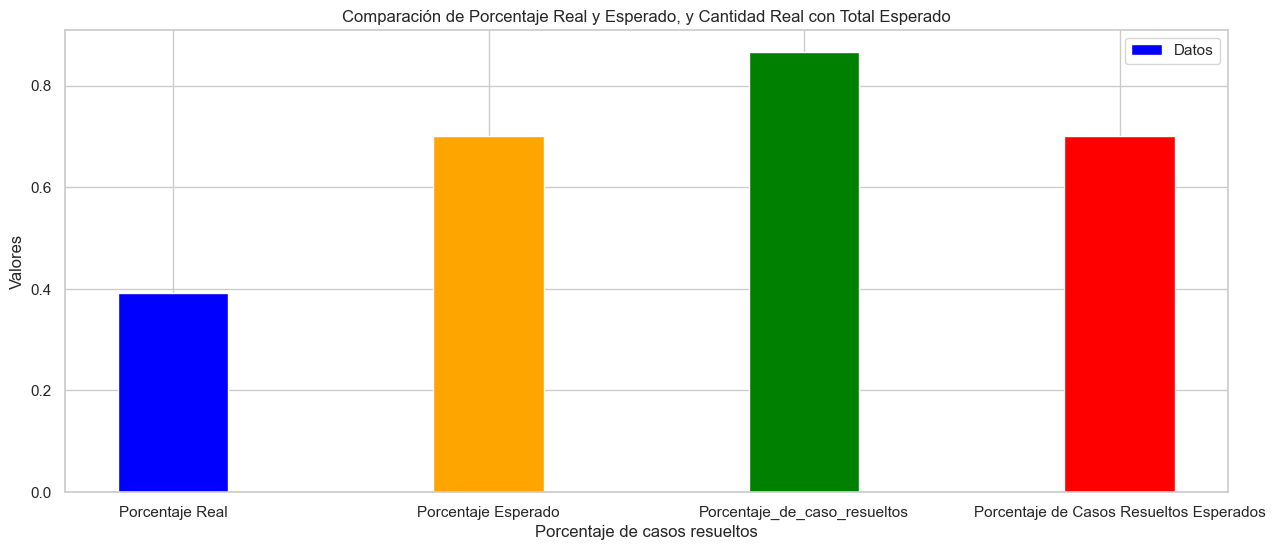

In [203]:
porcentaje_real = porcentaje1
porcentaje_esperado = 0.7
Porcentaje_de_caso_resueltos = Cantidad_real
total_de_casos_resueltos_esperados = 0.7


# Crear una lista de categorías para el gráfico de barras
categorias = ['Porcentaje Real', 'Porcentaje Esperado', 'Porcentaje_de_caso_resueltos', 'Porcentaje de Casos Resueltos Esperados']

# Crear una lista de valores correspondientes a las categorías
valores = [porcentaje_real, porcentaje_esperado, Porcentaje_de_caso_resueltos, total_de_casos_resueltos_esperados]

# Configurar el gráfico
bar_width = 0.35
índices = np.arange(len(categorias))

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(índices, valores, bar_width, label='Datos', color=['blue', 'orange', 'green', 'red'])

# Personalizar el gráfico
plt.xlabel('Porcentaje de casos resueltos')
plt.ylabel('Valores')
plt.title('Comparación de Porcentaje Real y Esperado, y Cantidad Real con Total Esperado')
plt.xticks(índices, categorias)
plt.legend()

# Mostrar el gráfico
plt.show()

## Grafico Hipotesis N°5

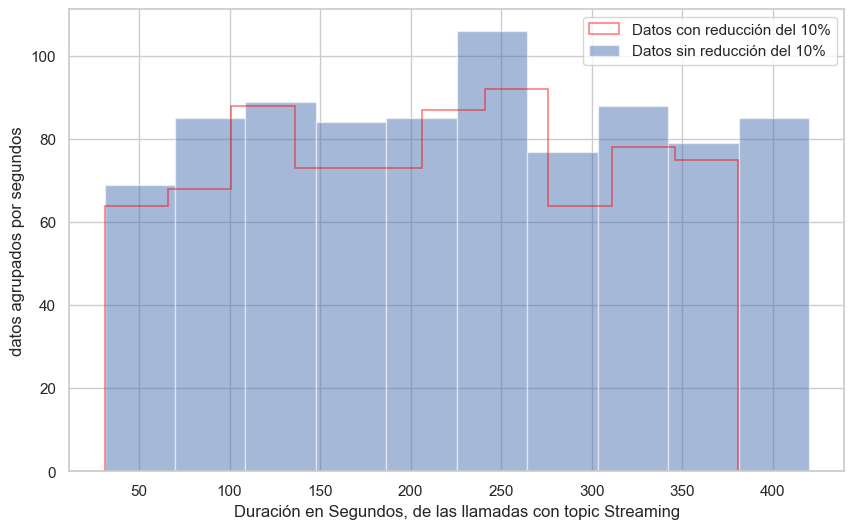

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Histograma para el grupo con reducción del 10%
plt.hist(grupo_con_reduccion_1_en_segundos, alpha=0.5, label='Datos con reducción del 10%',color='white', edgecolor= 'red', histtype='step', linewidth=1.2)

# Histograma para el grupo sin reducción del 10%
plt.hist(grupo_sin_reduccion_1_en_segundos, alpha=0.5, label='Datos sin reducción del 10%')

plt.xlabel('Duración en Segundos, de las llamadas con topic Streaming')
plt.ylabel('datos agrupados por segundos')
plt.legend()
plt.show()